In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn
import os
import sys

import percolating_cluster
import monopole_data
import wrappings
sys.path.append(os.path.join(os.path.dirname(
    os.path.abspath(''))))
import common.plots as plots
import common.scaler as scaler

pd.options.mode.chained_assignment = None


In [2]:
def fillup_copies(df):
    copy_num = df.groupby(['copy']).ngroups
    for i in range(copy_num - 1):
        df1 = df[df['copy'] == i]
        df2 = df[df['copy'] == i + 1]
        df3 = df1[~df1['conf'].isin(df2['conf'])]
        df3['copy'] = i + 1
        df = pd.concat([df, df3])
    return df.reset_index(drop=True)

def fill_funcational_max(df, groupby_keys):
    df2 = []
    copy_num = df.groupby(['copy']).ngroups
    for copy_max in range(copy_num):
        df1 = df[df['copy'] <= copy_max]
        df1 = df1.groupby(groupby_keys + ['conf'])['functional'].max().reset_index(level=groupby_keys + ['conf'])
        df2.append(df1.groupby(groupby_keys)['functional']\
                   .agg([('functional', 'mean'), ('std', lambda x: np.std(x, ddof=1)/math.sqrt(np.size(x)))]).reset_index(level=groupby_keys))
        df2[-1]['copy'] = copy_max
    return pd.concat(df2).reset_index(drop=True)

In [3]:
def read_functional(paths):
    df = []
    for path in paths:
        if 'chain' in path:
            chain = path['chain']
        else:
            chain = 0
        if 'padding' in path:
            padding = path['padding']
        else:
            padding = 4
        for i in range(path['conf_range'][0], path['conf_range'][1] + 1):
            data_path = path['path'] + f'_{i:0{padding}}'
            if(os.path.isfile(data_path)):
                df1 = pd.read_csv(data_path)
                if not df1.empty:
                    df.append(df1)
                    df[-1]['conf'] = i + chain * 100000
                    # if 'copy' in df[-1]:
                    #     if df[-1].loc[0, 'copy'] == 0:
                    #         df[-1]['copy'] = df[-1]['copy'] + 1
                    if 'parameters' in path:
                            for key, val in path['parameters'].items():
                                df[-1][key] = val
    return pd.concat(df)

In [4]:
def save_image(image_path, image_name, fg):
    try:
        os.makedirs(image_path)
    except:
        pass
    output_path = f'{image_path}/{image_name}'
    print(output_path)
    fg.savefig(output_path, dpi=800, facecolor='white')

def save_csv(df, path, name):
    try:
        os.makedirs(path)
    except:
        pass
    df.to_csv(f'{path}/{name}', index=False)

# make plot
def make_plot(data, x, y, title, image_path, image_name, hue=None, err=None):
    fg = seaborn.FacetGrid(data=data, hue=hue, height=5,
                               aspect=1.61, legend_out=True)
    fg.figure.suptitle(title)
    if err == None:
        fg.map(plt.errorbar, x, y, mfc=None, fmt='o', ms=5, capsize=5, lw=0.5, ls=None
           ).add_legend()
    else:
        fg.map(plt.errorbar, x, y, err, mfc=None, fmt='o', ms=5, capsize=5, lw=0.5, ls=None
           ).add_legend()
    fg.ax.set_xlabel(x)
    fg.ax.set_ylabel(y)
    fg.ax.spines['right'].set_visible(True)
    fg.ax.spines['top'].set_visible(True)
    fg.ax.minorticks_on()
    fg.ax.tick_params(which='both', bottom=True,
                          top=True, left=True, right=True)
    fg.ax.set_yscale('log')
    plt.show()
    save_image(image_path, image_name, fg)

/home/ilya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  func(*plot_args, **plot_kwargs)
/home/ilya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  func(*plot_args, **plot_kwargs)


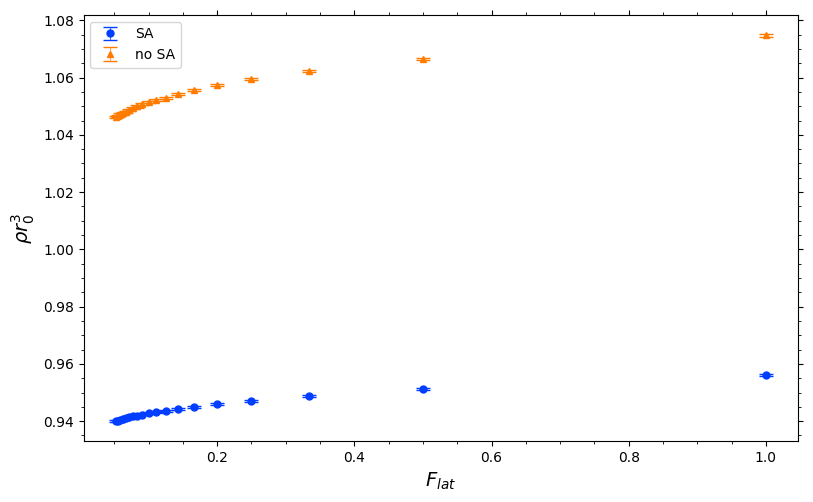

In [5]:
df = pd.read_csv('../../result/monopoles/su3/gluodynamics/density_SA')
df['functional'] = (1 - df['functional']) * 3/2
df['inv_copy'] = 1/df['copy']
plots.make_plot(df, 'inv_copy', 'density', 'SA', r'$F_{lat}$', r'$\rho r_{0}^{3}$', '', '../../images/monopoles/su3/gluodynamics', 'current_density_SA_inv_copy', True, err='std_density')

/home/ilya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  func(*plot_args, **plot_kwargs)
/home/ilya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  func(*plot_args, **plot_kwargs)


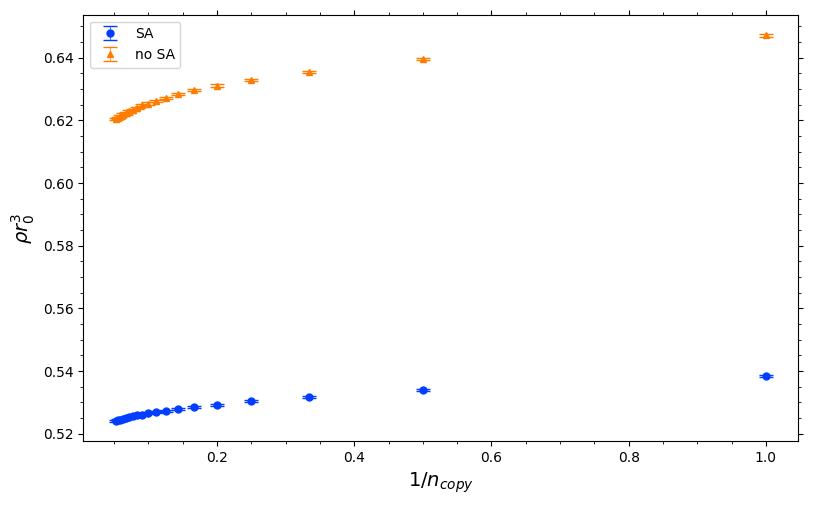

In [6]:
df = pd.read_csv('../../result/monopoles/su3/gluodynamics/percolating_density_SA')
df['functional'] = (1 - df['functional']) * 3/2
df['inv_copy'] = 1/df['copy']
plots.make_plot(df, 'inv_copy', 'density', 'SA', r'$1/n_{copy}$', r'$\rho r_{0}^{3}$', '', '../../images/monopoles/su3/gluodynamics', 'percolating_current_density_SA_inv_copy', True, err='std_density')

/home/ilya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  func(*plot_args, **plot_kwargs)
/home/ilya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  func(*plot_args, **plot_kwargs)


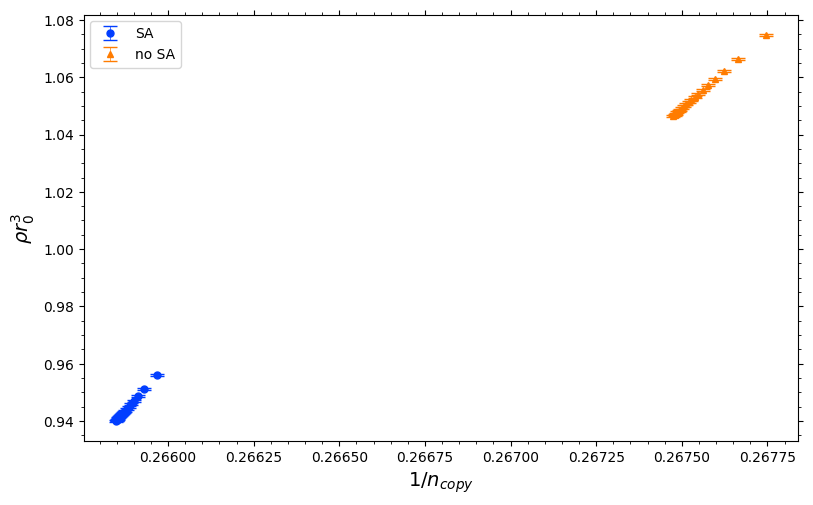

In [7]:
df = pd.read_csv('../../result/monopoles/su3/gluodynamics/density_SA')
df['functional'] = (1 - df['functional']) * 3/2
plots.make_plot(df, 'functional', 'density', 'SA', r'$1/n_{copy}$', r'$\rho r_{0}^{3}$', '', '../../images/monopoles/su3/gluodynamics', 'current_density_SA', True, err='std_density')

/home/ilya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  func(*plot_args, **plot_kwargs)
/home/ilya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  func(*plot_args, **plot_kwargs)


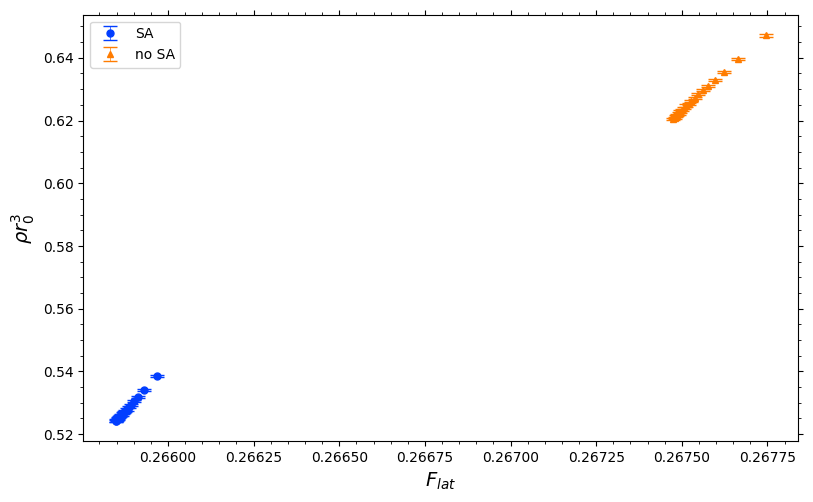

In [8]:
df = pd.read_csv('../../result/monopoles/su3/gluodynamics/percolating_density_SA')
df['functional'] = (1 - df['functional']) * 3/2
plots.make_plot(df, 'functional', 'density', 'SA', r'$F_{lat}$', r'$\rho r_{0}^{3}$', '', '../../images/monopoles/su3/gluodynamics', 'percolating current density SA', True, err='std_density')

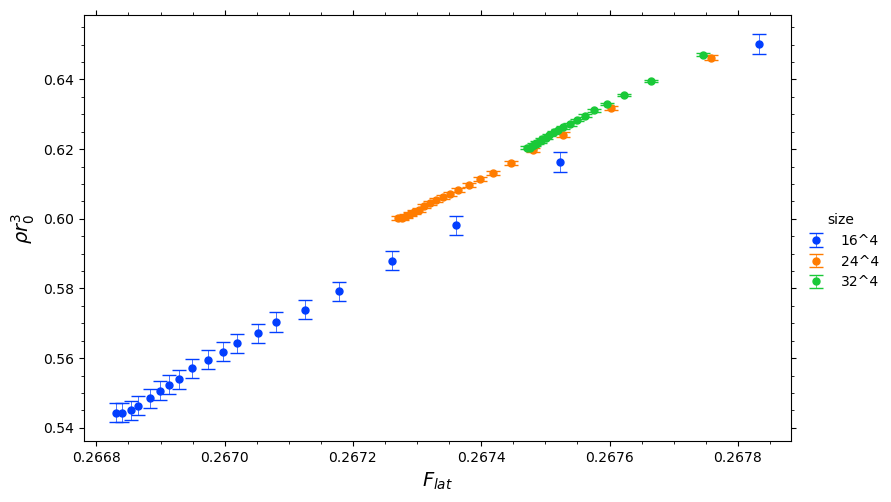

In [12]:
df = pd.read_csv('../../result/monopoles/su3/gluodynamics/percolating_density_size')
df['functional'] = (1 - df['functional']) * 3/2
plots.make_plot(df, 'functional', 'density', 'size', r'$F_{lat}$', r'$\rho r_{0}^{3}$', '', '../../images/monopoles/su3/gluodynamics', 'percolating current density size', True, err='std_density')

/home/ilya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  func(*plot_args, **plot_kwargs)
/home/ilya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  func(*plot_args, **plot_kwargs)
/home/ilya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  func(*plot_args, **plot_kwargs)
/home/ilya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument 

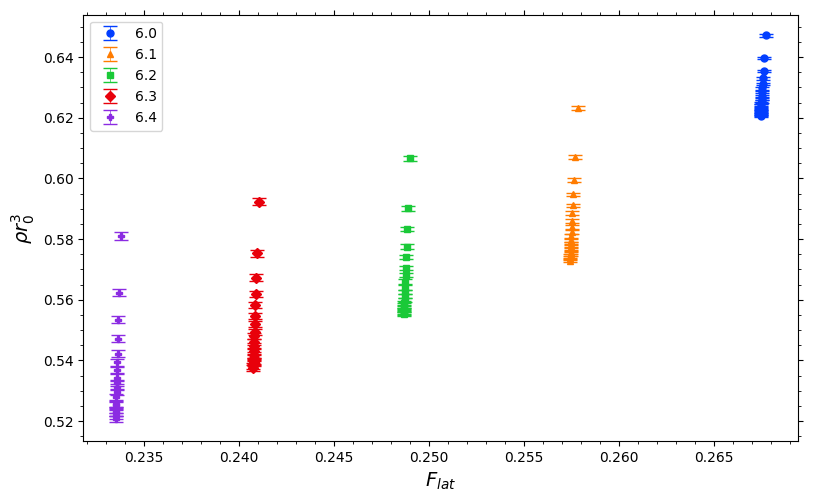

In [10]:
df = pd.read_csv('../../result/monopoles/su3/gluodynamics/percolating_density_beta')
df['functional'] = (1 - df['functional']) * 3/2
plots.make_plot(df, 'functional', 'density', 'beta', r'$F_{lat}$', r'$\rho r_{0}^{3}$', '', '../../images/monopoles/su3/gluodynamics', 'percolating current density beta', True, err='std_density')

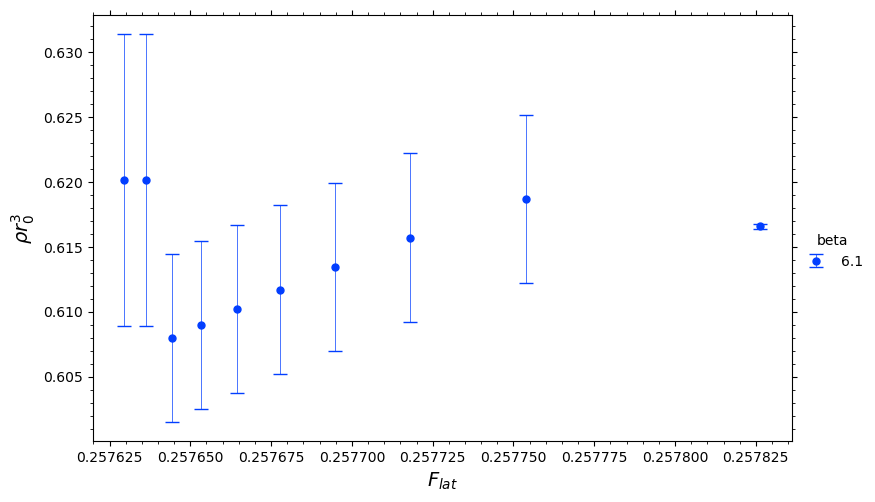

In [11]:
df = pd.read_csv('../../result/monopoles/su3/gluodynamics/percolating_density_36^4')
df['functional'] = (1 - df['functional']) * 3/2
plots.make_plot(df, 'functional', 'density', 'beta', r'$F_{lat}$', r'$\rho r_{0}^{3}$', '', '../../images/monopoles/su3/gluodynamics', 'percolating current density 36^4', True, err='std_density')

/home/ilya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  func(*plot_args, **plot_kwargs)
/home/ilya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  func(*plot_args, **plot_kwargs)
/home/ilya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  func(*plot_args, **plot_kwargs)
/home/ilya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument 

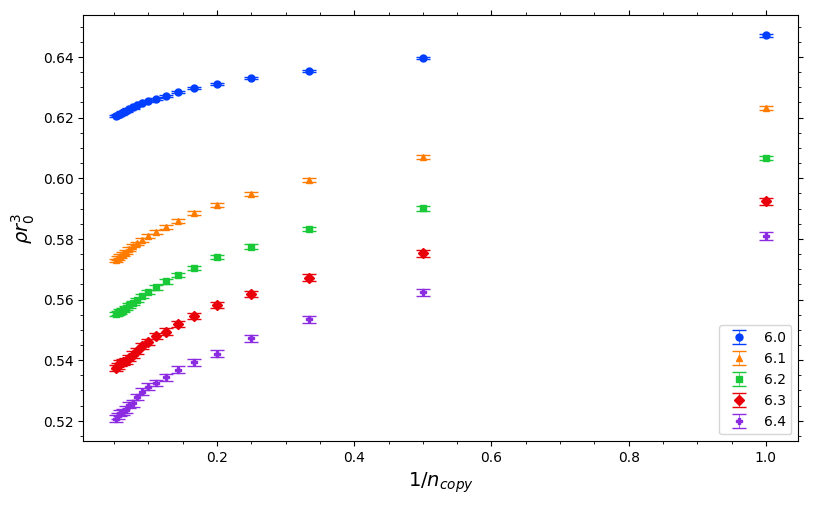

In [11]:
df = pd.read_csv('../../result/monopoles/su3/gluodynamics/percolating_density_beta')
df['functional'] = (1 - df['functional']) * 3/2
df['inv_copy'] = 1/df['copy']
plots.make_plot(df, 'inv_copy', 'density', 'beta', r'$1/n_{copy}$', r'$\rho r_{0}^{3}$', '', '../../images/monopoles/su3/gluodynamics', 'percolating current density beta inv copy', True, err='std_density')

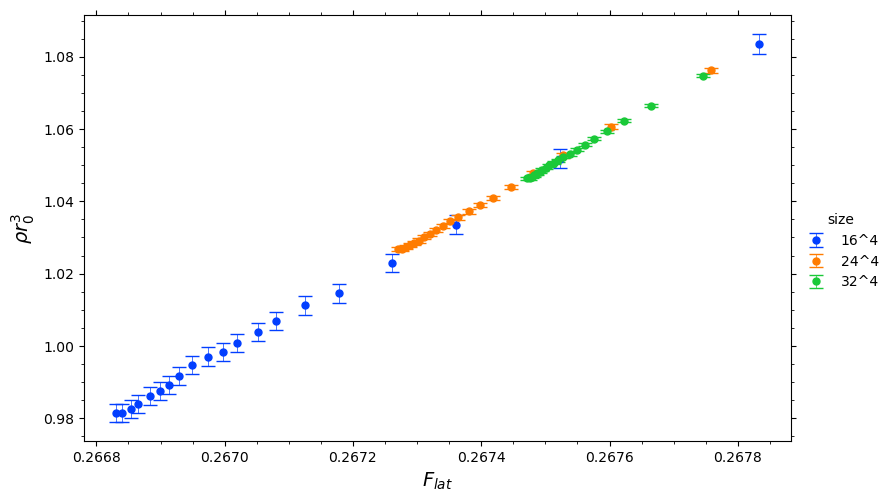

In [13]:
df = pd.read_csv('../../result/monopoles/su3/gluodynamics/density_size')
df['functional'] = (1 - df['functional']) * 3/2
plots.make_plot(df, 'functional', 'density', 'size', r'$F_{lat}$', r'$\rho r_{0}^{3}$', '', '../../images/monopoles/su3/gluodynamics', 'current density size', True, err='std_density')

/home/ilya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  func(*plot_args, **plot_kwargs)
/home/ilya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  func(*plot_args, **plot_kwargs)
/home/ilya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  func(*plot_args, **plot_kwargs)
/home/ilya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument 

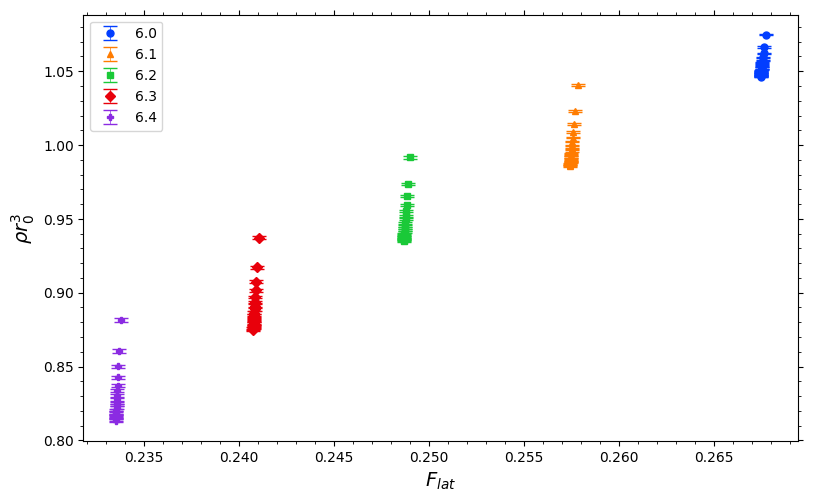

In [13]:
df = pd.read_csv('../../result/monopoles/su3/gluodynamics/density_beta')
df['functional'] = (1 - df['functional']) * 3/2
plots.make_plot(df, 'functional', 'density', 'beta', r'$F_{lat}$', r'$\rho r_{0}^{3}$', '', '../../images/monopoles/su3/gluodynamics', 'current density beta', True, err='std_density')

/home/ilya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  func(*plot_args, **plot_kwargs)
/home/ilya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  func(*plot_args, **plot_kwargs)
/home/ilya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  func(*plot_args, **plot_kwargs)
/home/ilya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument 

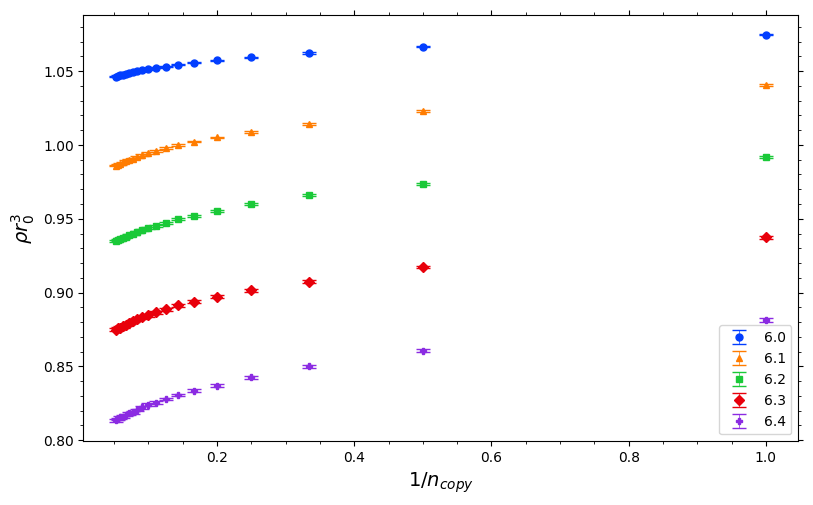

In [14]:
df = pd.read_csv('../../result/monopoles/su3/gluodynamics/density_beta')
df['functional'] = (1 - df['functional']) * 3/2
df['inv_copy'] = 1/df['copy']
plots.make_plot(df, 'inv_copy', 'density', 'beta', r'$1/n_{copy}$', r'$\rho r_{0}^{3}$', '', '../../images/monopoles/su3/gluodynamics', 'current density beta inv copy', True, err='std_density')

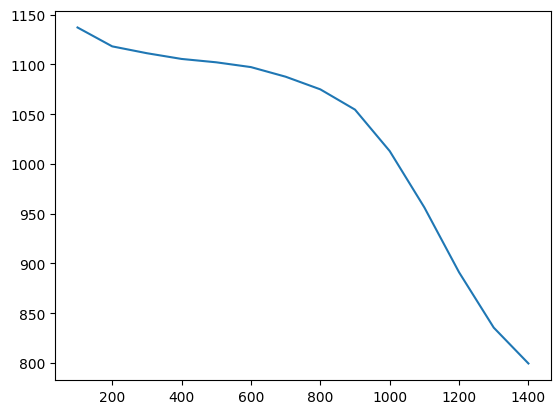

In [13]:
paths_wrapped = [{'path': '../../data/monopoles_su3/gluodynamics/16^4/beta6.0/steps_0/copies=20/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'size': '16^4'}, 'copies_num': 2, 'padding': 5}]
paths_unwrapped = [ {'path': '../../data/monopoles_su3/gluodynamics/16^4/beta6.0/steps_0/copies=20/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'size': '16^4'}, 'copies_num': 2, 'padding': 5}]
image_path = '../images/monopoles_su3/gluodynamics/24^4/beta6.0'
image_name = 'percolating_cluster_steps_500'

percolating_cluster.percolating_clusters(paths_unwrapped, paths_wrapped, 100, 1500, 100, ['conf'], image_path, image_name)

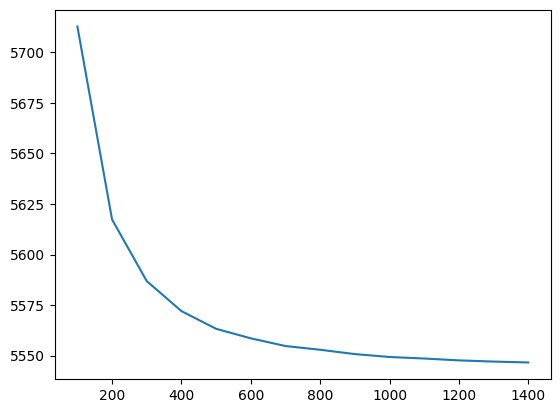

In [7]:
paths_wrapped = [{'path': '../../data/monopoles_su3/gluodynamics/24^4/beta6.0/steps_0/copies=20/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'size': '16^4'}, 'copies_num': 2}]
paths_unwrapped = [ {'path': '../../data/monopoles_su3/gluodynamics/24^4/beta6.0/steps_0/copies=20/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'size': '16^4'}, 'copies_num': 2}]
image_path = '../images/monopoles_su3/gluodynamics/24^4/beta6.0'
image_name = 'percolating_cluster_steps_500'

percolating_cluster.percolating_clusters(paths_unwrapped, paths_wrapped, 100, 1500, 100, ['conf'], image_path, image_name)

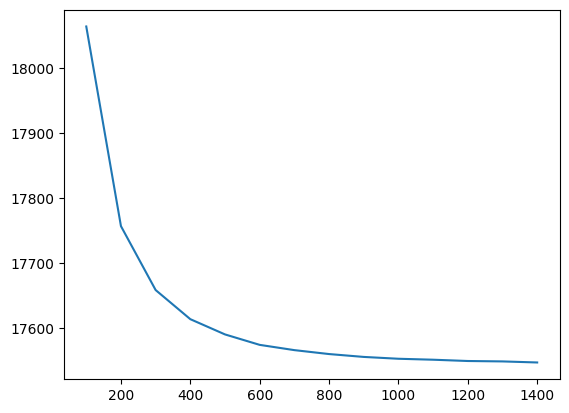

In [5]:
paths_wrapped = [{'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s1/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'size': '16^4'}, 'copies_num': 2}]
paths_unwrapped = [ {'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s1/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'size': '16^4'}, 'copies_num': 2}]
image_path = '../images/monopoles_su3/gluodynamics/24^4/beta6.0'
image_name = 'percolating_cluster_steps_500'

percolating_cluster.percolating_clusters(paths_unwrapped, paths_wrapped, 100, 1500, 100, ['conf'], image_path, image_name)

In [26]:
paths_wrapped = [{'path': '../../data/monopoles_su3/gluodynamics/28^4/beta6.1/steps_0/copies=20/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'size': '16^4'}, 'copies_num': 1}]
paths_unwrapped = [ {'path': '../../data/monopoles_su3/gluodynamics/28^4/beta6.1/steps_0/copies=20/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'size': '16^4'}, 'copies_num': 1}]
image_path = '../images/monopoles_su3/gluodynamics/24^4/beta6.0'
image_name = 'percolating_cluster_steps_500'

percolating_cluster.percolating_clusters(paths_unwrapped, paths_wrapped, 100, 15000, 500, ['conf'], image_path, image_name)

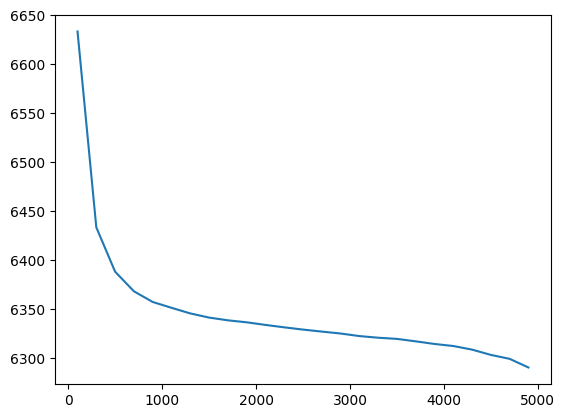

In [9]:
paths_wrapped = [{'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.2/steps_0/copies=20/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'size': '16^4'}, 'copies_num': 2}]
paths_unwrapped = [ {'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.2/steps_0/copies=20/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'size': '16^4'}, 'copies_num': 2}]
image_path = '../images/monopoles_su3/gluodynamics/24^4/beta6.0'
image_name = 'percolating_cluster_steps_500'

percolating_cluster.percolating_clusters(paths_unwrapped, paths_wrapped, 100, 5000, 200, ['conf'], image_path, image_name)

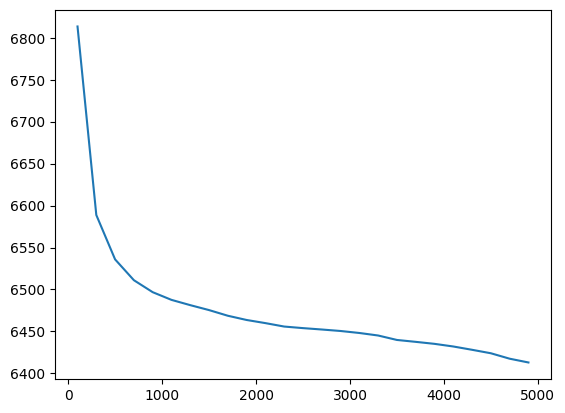

In [10]:
paths_wrapped = [{'path': '../../data/monopoles_su3/gluodynamics/36^4/beta6.3/steps_0/copies=20/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'size': '16^4'}, 'copies_num': 2}]
paths_unwrapped = [ {'path': '../../data/monopoles_su3/gluodynamics/36^4/beta6.3/steps_0/copies=20/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'size': '16^4'}, 'copies_num': 2}]
image_path = '../images/monopoles_su3/gluodynamics/24^4/beta6.0'
image_name = 'percolating_cluster_steps_500'

percolating_cluster.percolating_clusters(paths_unwrapped, paths_wrapped, 100, 5000, 200, ['conf'], image_path, image_name)

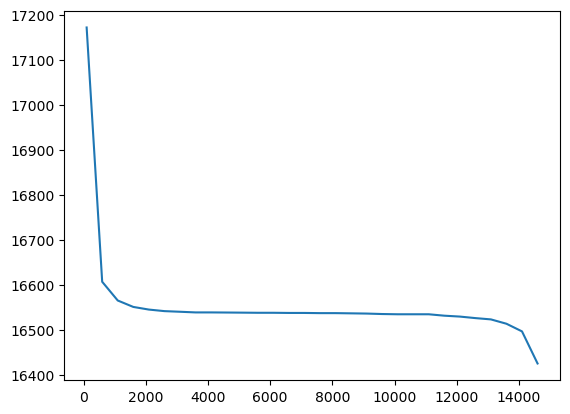

In [5]:
paths_wrapped = [{'path': '../../data/monopoles_su3/gluodynamics/36^4/beta6.1/steps_0/copies=10/s3/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 6000), 'parameters': {'size': '36^4'}, 'copies_num': 1}]
paths_unwrapped = [{'path': '../../data/monopoles_su3/gluodynamics/36^4/beta6.1/steps_0/copies=10/s3/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 6000), 'parameters': {'size': '36^4'}, 'copies_num': 1}]
image_path = '../images/monopoles_su3/gluodynamics/36^4/beta6.1'
image_name = 'percolating_cluster_steps_0'
percolating_cluster.percolating_clusters(paths_unwrapped, paths_wrapped, 100, 15000, 500, ['conf'], image_path, image_name)

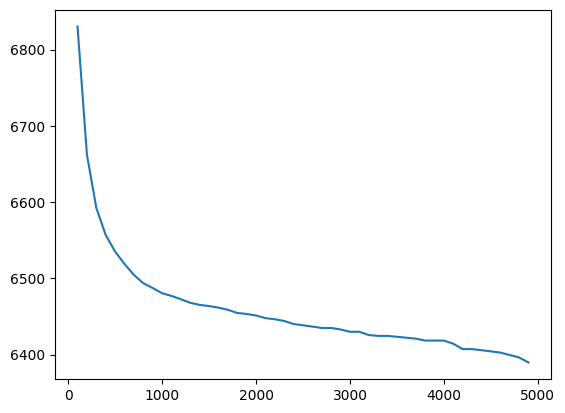

In [12]:
paths_wrapped = [{'path': '../../data/monopoles_su3/gluodynamics/40^4/beta6.4/steps_0/copies=20/s1/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'size': '16^4'}, 'copies_num': 2}]
paths_unwrapped = [ {'path': '../../data/monopoles_su3/gluodynamics/40^4/beta6.4/steps_0/copies=20/s1/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'size': '16^4'}, 'copies_num': 2}]
image_path = '../images/monopoles_su3/gluodynamics/24^4/beta6.0'
image_name = 'percolating_cluster_steps_500'

percolating_cluster.percolating_clusters(paths_unwrapped, paths_wrapped, 100, 5000, 100, ['conf'], image_path, image_name)

In [8]:
print(1000/scaler.get_r0(6)**3/(24**4*4))

0.11653607426911029


In [24]:
def cluster_percolating_density(paths_functional, paths_clusters_wrapped, paths_clusters_unwrapped, groupby_keys, image_path, image_name, path_csv, name_csv, hue=None):
    df_func = read_functional(paths_functional)
    df_func = fill_funcational_max(df_func, groupby_keys)
    df_clusters_wrapped = monopole_data.read_data_wrapped_copies(paths_clusters_wrapped)
    df_clusters_wrapped = df_clusters_wrapped.set_index(groupby_keys).groupby(groupby_keys).apply(fillup_copies, include_groups=False).reset_index(level=groupby_keys)
    df_clusters_unwrapped = monopole_data.read_data_unwrapped_copies(paths_clusters_unwrapped)
    df_clusters_unwrapped = df_clusters_unwrapped.set_index(groupby_keys).groupby(groupby_keys).apply(fillup_copies, include_groups=False).reset_index(level=groupby_keys)
    df_clusters_unwrapped.loc[df_clusters_unwrapped['length'] < df_clusters_unwrapped['length_threshold'], 'length'] = 0
    df_clusters_unwrapped['density'] = df_clusters_unwrapped['length'] * df_clusters_unwrapped['number'] / df_clusters_unwrapped['lattice_size'] / df_clusters_unwrapped['r0'] ** 3
    df_clusters_wrapped['length'] = df_clusters_wrapped['length'] / df_clusters_wrapped['lattice_size'] / df_clusters_wrapped['r0'] ** 3
    df_clusters_wrapped = df_clusters_wrapped.set_index(groupby_keys + ['color', 'conf', 'copy']).groupby(groupby_keys + ['color', 'conf', 'copy'])\
                                            .apply(percolating_cluster.find_percolating_wrapped_sum, include_groups=False)\
                                            .reset_index(level=groupby_keys + ['color', 'conf', 'copy'])
    df_clusters_wrapped = df_clusters_wrapped.rename(columns={'length': 'density'})
    df_clusters_wrapped = df_clusters_wrapped[groupby_keys + ['color', 'conf', 'density', 'copy']]
    df_clusters_unwrapped = df_clusters_unwrapped[groupby_keys + ['color', 'conf', 'density', 'copy']]
    df = pd.concat([df_clusters_unwrapped, df_clusters_wrapped])
    df = df.groupby(groupby_keys + ['color', 'conf', 'copy'])['density'].agg([('density', 'sum')]).reset_index(level=groupby_keys + ['color', 'conf'])
    df = df.groupby(groupby_keys + ['conf', 'copy'])['density'].agg([('density', 'mean')]).reset_index(level=groupby_keys + ['conf'])
    df = df.groupby(groupby_keys + ['copy'])['density'].agg([('density', 'mean'), ('std_density', lambda x: np.std(x, ddof=1)/math.sqrt(np.size(x)))]).reset_index(level=groupby_keys)
    df = df.merge(df_func, how='inner', on=groupby_keys + ['copy'])
    save_csv(df, path_csv, name_csv)
    plots.make_plot(df, 'functional', 'density', hue, 'functional', 'density', 'density of the current', image_path, image_name, True, err='std_density')

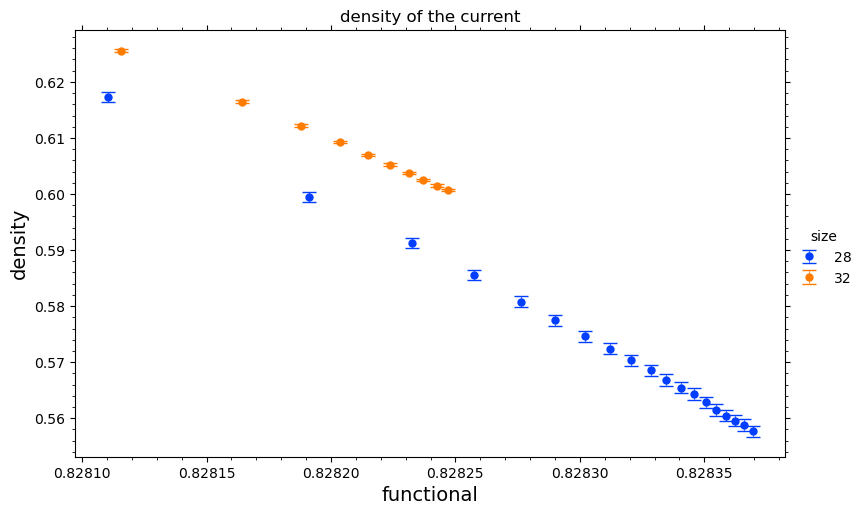

In [25]:
paths_functional = [{'path': '../../data/mag/functional/su3/gluodynamics/36^4/beta6.1/steps_0/copies=10/s1/functional', 'conf_range': (1, 6000), 'parameters': {'beta': 6.1, 'size': 32}, 'chain': 1},
                    {'path': '../../data/mag/functional/su3/gluodynamics/36^4/beta6.1/steps_0/copies=10/s2/functional', 'conf_range': (1, 6000), 'parameters': {'beta': 6.1, 'size': 32}, 'chain': 2},
                    {'path': '../../data/mag/functional/su3/gluodynamics/36^4/beta6.1/steps_0/copies=10/s3/functional', 'conf_range': (1, 6000), 'parameters': {'beta': 6.1, 'size': 32}, 'chain': 3},
                    {'path': '../../data/mag/functional/su3/gluodynamics/36^4/beta6.1/steps_0/copies=10/s4/functional', 'conf_range': (1, 6000), 'parameters': {'beta': 6.1, 'size': 32}, 'chain': 4},
                    {'path': '../../data/mag/functional/su3/gluodynamics/28^4/beta6.1/steps_0/copies=20/functional', 'conf_range': (1, 5000), 'parameters': {'beta': 6.1, 'size': 28}}]
paths_clusters_wrapped = [{'path': '../../data/monopoles_su3/gluodynamics/36^4/beta6.1/steps_0/copies=10/s1/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 6000), 'parameters': {'beta': 6.1, 'size': 32, 'lattice_size': 4*36**4, 'r0': scaler.get_r0(6.1)}, 'copies_num': 10, 'chain': 1},
                          {'path': '../../data/monopoles_su3/gluodynamics/36^4/beta6.1/steps_0/copies=10/s2/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 6000), 'parameters': {'beta': 6.1, 'size': 32, 'lattice_size': 4*36**4, 'r0': scaler.get_r0(6.1)}, 'copies_num': 10, 'chain': 2},
                          {'path': '../../data/monopoles_su3/gluodynamics/36^4/beta6.1/steps_0/copies=10/s3/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 6000), 'parameters': {'beta': 6.1, 'size': 32, 'lattice_size': 4*36**4, 'r0': scaler.get_r0(6.1)}, 'copies_num': 10, 'chain': 3},
                          {'path': '../../data/monopoles_su3/gluodynamics/36^4/beta6.1/steps_0/copies=10/s4/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 6000), 'parameters': {'beta': 6.1, 'size': 32, 'lattice_size': 4*36**4, 'r0': scaler.get_r0(6.1)}, 'copies_num': 10, 'chain': 4},
                          {'path': '../../data/monopoles_su3/gluodynamics/28^4/beta6.1/steps_0/copies=20/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.1, 'size': 28, 'lattice_size': 4*28**4, 'r0': scaler.get_r0(6.1)}, 'copies_num': 19}]
paths_clusters_unwrapped = [{'path': '../../data/monopoles_su3/gluodynamics/36^4/beta6.1/steps_0/copies=10/s1/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 6000), 'parameters': {'beta': 6.1, 'size': 32, 'lattice_size': 4*36**4, 'r0': scaler.get_r0(6.1), 'length_threshold': 6000}, 'copies_num': 10, 'chain': 1},
                            {'path': '../../data/monopoles_su3/gluodynamics/36^4/beta6.1/steps_0/copies=10/s2/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 6000), 'parameters': {'beta': 6.1, 'size': 32, 'lattice_size': 4*36**4, 'r0': scaler.get_r0(6.1), 'length_threshold': 6000}, 'copies_num': 10, 'chain': 2},
                            {'path': '../../data/monopoles_su3/gluodynamics/36^4/beta6.1/steps_0/copies=10/s3/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 6000), 'parameters': {'beta': 6.1, 'size': 32, 'lattice_size': 4*36**4, 'r0': scaler.get_r0(6.1), 'length_threshold': 6000}, 'copies_num': 10, 'chain': 3},
                            {'path': '../../data/monopoles_su3/gluodynamics/36^4/beta6.1/steps_0/copies=10/s4/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 6000), 'parameters': {'beta': 6.1, 'size': 32, 'lattice_size': 4*36**4, 'r0': scaler.get_r0(6.1), 'length_threshold': 6000}, 'copies_num': 10, 'chain': 4},
                            {'path': '../../data/monopoles_su3/gluodynamics/28^4/beta6.1/steps_0/copies=20/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.1, 'size': 28, 'lattice_size': 4*28**4, 'r0': scaler.get_r0(6.1), 'length_threshold': 5000}, 'copies_num': 19}]
cluster_percolating_density(paths_functional, paths_clusters_wrapped, paths_clusters_unwrapped, ['size'], '../../images/monopoles/su3/gluodynamics', 'percolating current density beta6.1', '../../result/monopoles/su3/gluodynamics', 'percolating_density_beta6p1', hue='size')

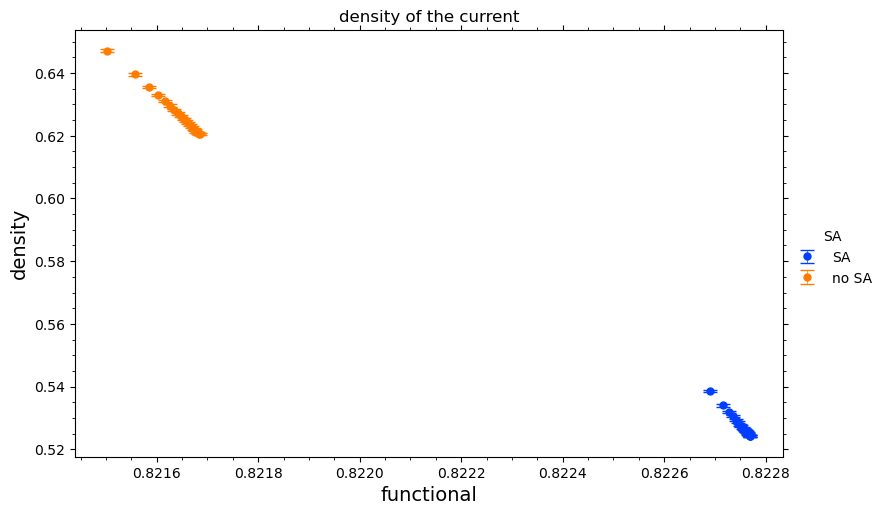

In [16]:
paths_functional = [{'path': '../../data/mag/functional/su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s1/functional', 'conf_range': (1, 5000), 'parameters': {'SA': 'no SA'}, 'chain': 1},
                    {'path': '../../data/mag/functional/su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s2/functional', 'conf_range': (1, 5000), 'parameters': {'SA': 'no SA'}, 'chain': 2},
                    {'path': '../../data/mag/functional/su3/gluodynamics/32^4/beta6.0/steps_100/copies=20/s1/functional', 'conf_range': (1, 5000), 'parameters': {'SA': 'SA'}, 'chain': 1},
                    {'path': '../../data/mag/functional/su3/gluodynamics/32^4/beta6.0/steps_100/copies=20/s2/functional', 'conf_range': (1, 5000), 'parameters': {'SA': 'SA'}, 'chain': 2}]
paths_clusters_wrapped = [{'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s1/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'SA': 'no SA', 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6)}, 'copies_num': 20, 'chain': 1},
                          {'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s2/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'SA': 'no SA', 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6)}, 'copies_num': 20, 'chain': 2},
                          {'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_100/copies=20/s1/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'SA': 'SA', 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6)}, 'copies_num': 20, 'chain': 1},
                          {'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_100/copies=20/s2/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'SA': 'SA', 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6)}, 'copies_num': 20, 'chain': 2}]
paths_clusters_unwrapped = [{'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s1/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'SA': 'no SA', 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6), 'length_threshold': 5000}, 'copies_num': 20, 'chain': 1},
                            {'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s2/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'SA': 'no SA', 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6), 'length_threshold': 5000}, 'copies_num': 20, 'chain': 2},
                            {'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_100/copies=20/s1/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'SA': 'SA', 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6), 'length_threshold': 5000}, 'copies_num': 20, 'chain': 1},
                            {'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_100/copies=20/s2/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'SA': 'SA', 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6), 'length_threshold': 5000}, 'copies_num': 20, 'chain': 2}]
cluster_percolating_density(paths_functional, paths_clusters_wrapped, paths_clusters_unwrapped, ['SA'], '../../images/monopoles/su3/gluodynamics', 'percolating current density SA', '../../result/monopoles/su3/gluodynamics', 'percolating_density_SA', hue='SA')

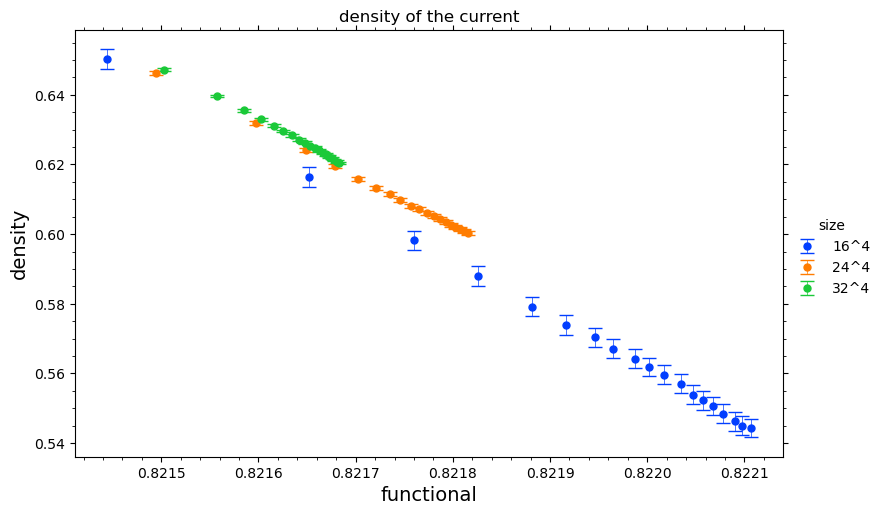

In [12]:
paths_functional = [{'path': '../../data/mag/functional/su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s1/functional', 'conf_range': (1, 5000), 'parameters': {'size': '32^4'}, 'chain': 1},
                    {'path': '../../data/mag/functional/su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s2/functional', 'conf_range': (1, 5000), 'parameters': {'size': '32^4'}, 'chain': 2},
                    {'path': '../../data/mag/functional/su3/gluodynamics/24^4/beta6.0/steps_0/copies=20/functional', 'conf_range': (1, 5000), 'parameters': {'size': '24^4'}},
                    {'path': '../../data/mag/functional/su3/gluodynamics/16^4/beta6.0/steps_0/copies=20/functional', 'conf_range': (1, 5000), 'parameters': {'size': '16^4'}, 'padding': 5}]
paths_clusters_wrapped = [{'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s1/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'size': '32^4', 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6)}, 'copies_num': 20, 'chain': 1},
                          {'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s2/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'size': '32^4', 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6)}, 'copies_num': 20, 'chain': 2},
                          {'path': '../../data/monopoles_su3/gluodynamics/24^4/beta6.0/steps_0/copies=20/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'size': '24^4', 'lattice_size': 4*24**4, 'r0': scaler.get_r0(6)}, 'copies_num': 20},
                          {'path': '../../data/monopoles_su3/gluodynamics/16^4/beta6.0/steps_0/copies=20/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'size': '16^4', 'lattice_size': 4*16**4, 'r0': scaler.get_r0(6)}, 'copies_num': 20}]
paths_clusters_unwrapped = [{'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s1/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'size': '32^4', 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6), 'length_threshold': 5000}, 'copies_num': 20, 'chain': 1},
                            {'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s2/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'size': '32^4', 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6), 'length_threshold': 5000}, 'copies_num': 20, 'chain': 2},
                            {'path': '../../data/monopoles_su3/gluodynamics/24^4/beta6.0/steps_0/copies=20/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'size': '24^4', 'lattice_size': 4*24**4, 'r0': scaler.get_r0(6), 'length_threshold': 1500}, 'copies_num': 20},
                            {'path': '../../data/monopoles_su3/gluodynamics/16^4/beta6.0/steps_0/copies=20/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'size': '16^4', 'lattice_size': 4*16**4, 'r0': scaler.get_r0(6), 'length_threshold': 500}, 'copies_num': 20}]
cluster_percolating_density(paths_functional, paths_clusters_wrapped, paths_clusters_unwrapped, ['size'], '../../images/monopoles/su3/gluodynamics', 'percolating current density size', '../../result/monopoles/su3/gluodynamics', 'percolating_density_size', hue='size')

In [5]:
paths_functional = [{'path': '../../data/mag/functional/su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s1/functional', 'conf_range': (1, 5000), 'parameters': {'beta': 6.0}, 'chain': 1},
                    {'path': '../../data/mag/functional/su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s2/functional', 'conf_range': (1, 5000), 'parameters': {'beta': 6.0}, 'chain': 2},
                    {'path': '../../data/mag/functional/su3/gluodynamics/28^4/beta6.1/steps_0/copies=20/functional', 'conf_range': (1, 5000), 'parameters': {'beta': 6.1}},
                    {'path': '../../data/mag/functional/su3/gluodynamics/32^4/beta6.2/steps_0/copies=20/functional', 'conf_range': (1, 5000), 'parameters': {'beta': 6.2}},
                    {'path': '../../data/mag/functional/su3/gluodynamics/36^4/beta6.3/steps_0/copies=20/functional', 'conf_range': (1, 5000), 'parameters': {'beta': 6.3}},
                    {'path': '../../data/mag/functional/su3/gluodynamics/40^4/beta6.4/steps_0/copies=20/s1/functional', 'conf_range': (1, 5000), 'parameters': {'beta': 6.4}, 'chain': 1},
                    {'path': '../../data/mag/functional/su3/gluodynamics/40^4/beta6.4/steps_0/copies=20/s2/functional', 'conf_range': (1, 5000), 'parameters': {'beta': 6.4}, 'chain': 2}]
paths_clusters_wrapped = [{'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s1/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.0, 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6)}, 'copies_num': 20, 'chain': 1},
                          {'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s2/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.0, 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6)}, 'copies_num': 20, 'chain': 2},
                          {'path': '../../data/monopoles_su3/gluodynamics/28^4/beta6.1/steps_0/copies=20/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.1, 'lattice_size': 4*28**4, 'r0': scaler.get_r0(6.1)}, 'copies_num': 20},
                          {'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.2/steps_0/copies=20/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.2, 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6.2)}, 'copies_num': 20},
                          {'path': '../../data/monopoles_su3/gluodynamics/36^4/beta6.3/steps_0/copies=20/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.3, 'lattice_size': 4*36**4, 'r0': scaler.get_r0(6.3)}, 'copies_num': 20},
                          {'path': '../../data/monopoles_su3/gluodynamics/40^4/beta6.4/steps_0/copies=20/s1/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.4, 'lattice_size': 4*40**4, 'r0': scaler.get_r0(6.4)}, 'copies_num': 20, 'chain': 1},
                          {'path': '../../data/monopoles_su3/gluodynamics/40^4/beta6.4/steps_0/copies=20/s2/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.4, 'lattice_size': 4*40**4, 'r0': scaler.get_r0(6.4)}, 'copies_num': 20, 'chain': 2}]
paths_clusters_unwrapped = [{'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s1/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.0, 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6), 'length_threshold': 5000}, 'copies_num': 20, 'chain': 1},
                            {'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s2/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.0, 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6), 'length_threshold': 5000}, 'copies_num': 20, 'chain': 2},
                            {'path': '../../data/monopoles_su3/gluodynamics/28^4/beta6.1/steps_0/copies=20/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.1, 'lattice_size': 4*28**4, 'r0': scaler.get_r0(6.1), 'length_threshold': 3000}, 'copies_num': 20},
                            {'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.2/steps_0/copies=20/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.2, 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6.2), 'length_threshold': 3000}, 'copies_num': 20},
                            {'path': '../../data/monopoles_su3/gluodynamics/36^4/beta6.3/steps_0/copies=20/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.3, 'lattice_size': 4*36**4, 'r0': scaler.get_r0(6.3), 'length_threshold': 3000}, 'copies_num': 20},
                            {'path': '../../data/monopoles_su3/gluodynamics/40^4/beta6.4/steps_0/copies=20/s1/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.4, 'lattice_size': 4*40**4, 'r0': scaler.get_r0(6.4), 'length_threshold': 3000}, 'copies_num': 20, 'chain': 1},
                            {'path': '../../data/monopoles_su3/gluodynamics/40^4/beta6.4/steps_0/copies=20/s2/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.4, 'lattice_size': 4*40**4, 'r0': scaler.get_r0(6.4), 'length_threshold': 3000}, 'copies_num': 20, 'chain': 2}]
cluster_percolating_density(paths_functional, paths_clusters_wrapped, paths_clusters_unwrapped, ['beta'], '../../images/monopoles/su3/gluodynamics', 'percolating current density beta', '../../result/monopoles/su3/gluodynamics', 'percolating_density_beta', hue='beta')

NameError: name 'cluster_percolating_density' is not defined

In [22]:
def cluster_density(paths_functional, paths_clusters_wrapped, paths_clusters_unwrapped, groupby_keys, image_path, image_name, path_csv, name_csv, hue=None):
    df_func = read_functional(paths_functional)
    df_func = fill_funcational_max(df_func, groupby_keys)
    df_clusters_wrapped = monopole_data.read_data_wrapped_copies(paths_clusters_wrapped)
    df_clusters_wrapped = df_clusters_wrapped.set_index(groupby_keys).groupby(groupby_keys).apply(fillup_copies, include_groups=False).reset_index(level=groupby_keys)
    df_clusters_unwrapped = monopole_data.read_data_unwrapped_copies(paths_clusters_unwrapped)
    df_clusters_unwrapped = df_clusters_unwrapped.set_index(groupby_keys).groupby(groupby_keys).apply(fillup_copies, include_groups=False).reset_index(level=groupby_keys)
    df_clusters_wrapped['density'] = df_clusters_wrapped['length'] / df_clusters_wrapped['lattice_size'] / df_clusters_wrapped['r0'] ** 3
    df_clusters_unwrapped['density'] = df_clusters_unwrapped['length'] * df_clusters_unwrapped['number'] / df_clusters_unwrapped['lattice_size'] / df_clusters_unwrapped['r0'] ** 3
    df_clusters_wrapped = df_clusters_wrapped[groupby_keys + ['color', 'conf', 'density', 'copy']]
    df_clusters_unwrapped = df_clusters_unwrapped[groupby_keys + ['color', 'conf', 'density', 'copy']]
    df = pd.concat([df_clusters_wrapped, df_clusters_unwrapped])
    df = df.groupby(groupby_keys + ['color', 'conf', 'copy'])['density'].agg([('density', 'sum')]).reset_index(level=groupby_keys + ['color', 'conf'])
    df = df.groupby(groupby_keys + ['conf', 'copy'])['density'].agg([('density', 'mean')]).reset_index(level=groupby_keys + ['conf'])
    df = df.groupby(groupby_keys + ['copy'])['density'].agg([('density', 'mean'), ('std_density', lambda x: np.std(x, ddof=1)/math.sqrt(np.size(x)))]).reset_index(level=groupby_keys)
    df = df.merge(df_func, how='inner', on=groupby_keys + ['copy'])
    save_csv(df, path_csv, name_csv)
    plots.make_plot(df, 'functional', 'density', hue, 'functional', 'density', 'density of the current', image_path, image_name, True, err='std_density')

    copy  functional  conf  beta  size
0      0    0.828314     1   6.1    28
1      1    0.828128     1   6.1    28
2      2    0.828214     1   6.1    28
3      3    0.828243     1   6.1    28
4      4    0.828453     1   6.1    28
..   ...         ...   ...   ...   ...
15    15    0.828160  5000   6.1    28
16    16    0.828148  5000   6.1    28
17    17    0.828097  5000   6.1    28
18    18    0.828120  5000   6.1    28
19    19    0.828012  5000   6.1    28

[100000 rows x 5 columns]
    size  functional       std  copy
0     28    0.828110  0.000003     0
2     28    0.828191  0.000003     1
4     28    0.828232  0.000003     2
6     28    0.828258  0.000003     3
8     28    0.828277  0.000003     4
10    28    0.828290  0.000003     5
12    28    0.828302  0.000003     6
14    28    0.828312  0.000003     7
16    28    0.828321  0.000003     8
18    28    0.828329  0.000003     9
20    28    0.828335  0.000003    10
22    28    0.828341  0.000003    11
24    28    0.828346  0.

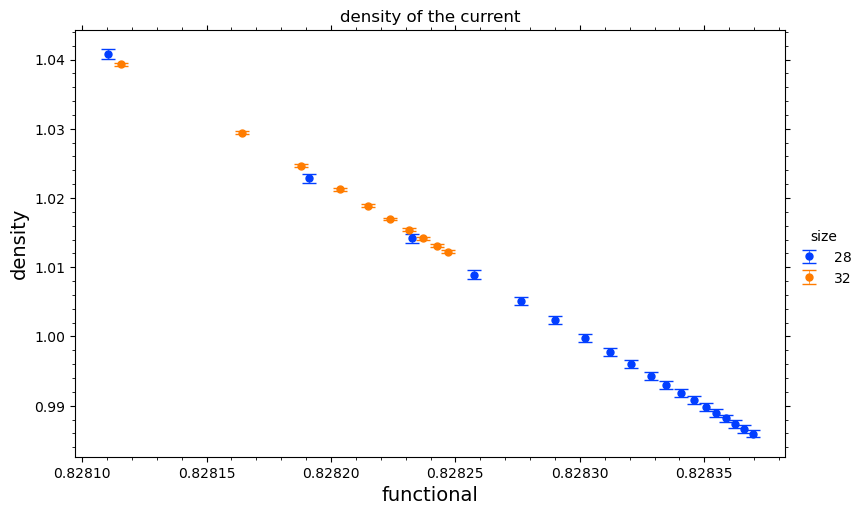

In [23]:
paths_functional = [{'path': '../../data/mag/functional/su3/gluodynamics/36^4/beta6.1/steps_0/copies=10/s1/functional', 'conf_range': (1, 6000), 'parameters': {'beta': 6.1, 'size': 32}, 'chain': 1},
                    {'path': '../../data/mag/functional/su3/gluodynamics/36^4/beta6.1/steps_0/copies=10/s2/functional', 'conf_range': (1, 6000), 'parameters': {'beta': 6.1, 'size': 32}, 'chain': 2},
                    {'path': '../../data/mag/functional/su3/gluodynamics/36^4/beta6.1/steps_0/copies=10/s3/functional', 'conf_range': (1, 6000), 'parameters': {'beta': 6.1, 'size': 32}, 'chain': 3},
                    {'path': '../../data/mag/functional/su3/gluodynamics/36^4/beta6.1/steps_0/copies=10/s4/functional', 'conf_range': (1, 6000), 'parameters': {'beta': 6.1, 'size': 32}, 'chain': 4},
                    {'path': '../../data/mag/functional/su3/gluodynamics/28^4/beta6.1/steps_0/copies=20/functional', 'conf_range': (1, 5000), 'parameters': {'beta': 6.1, 'size': 28}}]
paths_clusters_wrapped = [{'path': '../../data/monopoles_su3/gluodynamics/36^4/beta6.1/steps_0/copies=10/s1/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 6000), 'parameters': {'beta': 6.1, 'size': 32, 'lattice_size': 4*36**4, 'r0': scaler.get_r0(6.1)}, 'copies_num': 10, 'chain': 1},
                          {'path': '../../data/monopoles_su3/gluodynamics/36^4/beta6.1/steps_0/copies=10/s2/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 6000), 'parameters': {'beta': 6.1, 'size': 32, 'lattice_size': 4*36**4, 'r0': scaler.get_r0(6.1)}, 'copies_num': 10, 'chain': 2},
                          {'path': '../../data/monopoles_su3/gluodynamics/36^4/beta6.1/steps_0/copies=10/s3/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 6000), 'parameters': {'beta': 6.1, 'size': 32, 'lattice_size': 4*36**4, 'r0': scaler.get_r0(6.1)}, 'copies_num': 10, 'chain': 3},
                          {'path': '../../data/monopoles_su3/gluodynamics/36^4/beta6.1/steps_0/copies=10/s4/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 6000), 'parameters': {'beta': 6.1, 'size': 32, 'lattice_size': 4*36**4, 'r0': scaler.get_r0(6.1)}, 'copies_num': 10, 'chain': 4},
                          {'path': '../../data/monopoles_su3/gluodynamics/28^4/beta6.1/steps_0/copies=20/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.1, 'size': 28, 'lattice_size': 4*28**4, 'r0': scaler.get_r0(6.1)}, 'copies_num': 19}]
paths_clusters_unwrapped = [{'path': '../../data/monopoles_su3/gluodynamics/36^4/beta6.1/steps_0/copies=10/s1/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 6000), 'parameters': {'beta': 6.1, 'size': 32, 'lattice_size': 4*36**4, 'r0': scaler.get_r0(6.1), 'length_threshold': 6000}, 'copies_num': 10, 'chain': 1},
                            {'path': '../../data/monopoles_su3/gluodynamics/36^4/beta6.1/steps_0/copies=10/s2/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 6000), 'parameters': {'beta': 6.1, 'size': 32, 'lattice_size': 4*36**4, 'r0': scaler.get_r0(6.1), 'length_threshold': 6000}, 'copies_num': 10, 'chain': 2},
                            {'path': '../../data/monopoles_su3/gluodynamics/36^4/beta6.1/steps_0/copies=10/s3/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 6000), 'parameters': {'beta': 6.1, 'size': 32, 'lattice_size': 4*36**4, 'r0': scaler.get_r0(6.1), 'length_threshold': 6000}, 'copies_num': 10, 'chain': 3},
                            {'path': '../../data/monopoles_su3/gluodynamics/36^4/beta6.1/steps_0/copies=10/s4/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 6000), 'parameters': {'beta': 6.1, 'size': 32, 'lattice_size': 4*36**4, 'r0': scaler.get_r0(6.1), 'length_threshold': 6000}, 'copies_num': 10, 'chain': 4},
                            {'path': '../../data/monopoles_su3/gluodynamics/28^4/beta6.1/steps_0/copies=20/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.1, 'size': 28, 'lattice_size': 4*28**4, 'r0': scaler.get_r0(6.1), 'length_threshold': 5000}, 'copies_num': 19}]
cluster_density(paths_functional, paths_clusters_wrapped, paths_clusters_unwrapped, ['size'], '../../images/monopoles/su3/gluodynamics', 'current density beta6.1', '../../result/monopoles/su3/gluodynamics', 'density_beta6.1', hue='size')

/home/ilya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  func(*plot_args, **plot_kwargs)
/home/ilya/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  func(*plot_args, **plot_kwargs)


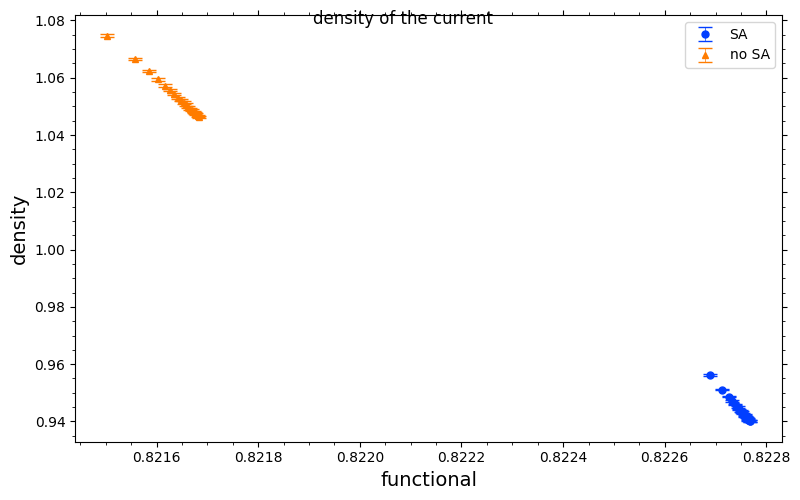

FileNotFoundError: [Errno 2] No such file or directory: '/home/ilya/soft/lattice/observables/images/monopoles/su3/gluodynamics/current density SA.png'

In [ ]:
paths_functional = [{'path': '../../data/mag/functional/su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s1/functional', 'conf_range': (1, 5000), 'parameters': {'SA': 'no SA'}, 'chain': 1},
                    {'path': '../../data/mag/functional/su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s2/functional', 'conf_range': (1, 5000), 'parameters': {'SA': 'no SA'}, 'chain': 2},
                    {'path': '../../data/mag/functional/su3/gluodynamics/32^4/beta6.0/steps_100/copies=20/s1/functional', 'conf_range': (1, 5000), 'parameters': {'SA': 'SA'}, 'chain': 1},
                    {'path': '../../data/mag/functional/su3/gluodynamics/32^4/beta6.0/steps_100/copies=20/s2/functional', 'conf_range': (1, 5000), 'parameters': {'SA': 'SA'}, 'chain': 2}]
paths_clusters_wrapped = [{'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s1/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'SA': 'no SA', 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6)}, 'copies_num': 20, 'chain': 1},
                          {'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s2/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'SA': 'no SA', 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6)}, 'copies_num': 20, 'chain': 2},
                          {'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_100/copies=20/s1/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'SA': 'SA', 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6)}, 'copies_num': 20, 'chain': 1},
                          {'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_100/copies=20/s2/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'SA': 'SA', 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6)}, 'copies_num': 20, 'chain': 2}]
paths_clusters_unwrapped = [{'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s1/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'SA': 'no SA', 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6)}, 'copies_num': 20, 'chain': 1},
                            {'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s2/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'SA': 'no SA', 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6)}, 'copies_num': 20, 'chain': 2},
                            {'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_100/copies=20/s1/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'SA': 'SA', 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6)}, 'copies_num': 20, 'chain': 1},
                            {'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_100/copies=20/s2/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'SA': 'SA', 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6)}, 'copies_num': 20, 'chain': 2}]
cluster_density(paths_functional, paths_clusters_wrapped, paths_clusters_unwrapped, ['SA'], '../../images/monopoles/su3/gluodynamics', 'current density SA', '../../result/monopoles/su3/gluodynamics', 'density_SA', hue='SA')

In [ ]:
paths_functional = [{'path': '../../data/mag/functional/su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s1/functional', 'conf_range': (1, 5000), 'parameters': {'size': '32^4'}, 'chain': 1},
                    {'path': '../../data/mag/functional/su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s2/functional', 'conf_range': (1, 5000), 'parameters': {'size': '32^4'}, 'chain': 2},
                    {'path': '../../data/mag/functional/su3/gluodynamics/16^4/beta6.0/steps_0/copies=20/functional', 'conf_range': (1, 5000), 'parameters': {'size': '16^4'}, 'padding': 5},
                    {'path': '../../data/mag/functional/su3/gluodynamics/24^4/beta6.0/steps_0/copies=20/functional', 'conf_range': (1, 5000), 'parameters': {'size': '24^4'}}]
paths_clusters_wrapped = [{'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s1/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'size': '32^4', 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6)}, 'copies_num': 19, 'chain': 1},
                          {'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s2/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'size': '32^4', 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6)}, 'copies_num': 19, 'chain': 2},
                          {'path': '../../data/monopoles_su3/gluodynamics/24^4/beta6.0/steps_0/copies=20/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'size': '24^4', 'lattice_size': 4*24**4, 'r0': scaler.get_r0(6)}, 'copies_num': 19},
                          {'path': '../../data/monopoles_su3/gluodynamics/16^4/beta6.0/steps_0/copies=20/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'size': '16^4', 'lattice_size': 4*16**4, 'r0': scaler.get_r0(6)}, 'copies_num': 19}]
paths_clusters_unwrapped = [{'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s1/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'size': '32^4', 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6)}, 'copies_num': 19, 'chain': 1},
                            {'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s2/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'size': '32^4', 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6)}, 'copies_num': 19, 'chain': 2},
                            {'path': '../../data/monopoles_su3/gluodynamics/24^4/beta6.0/steps_0/copies=20/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'size': '24^4', 'lattice_size': 4*24**4, 'r0': scaler.get_r0(6)}, 'copies_num': 19},
                            {'path': '../../data/monopoles_su3/gluodynamics/16^4/beta6.0/steps_0/copies=20/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'size': '16^4', 'lattice_size': 4*16**4, 'r0': scaler.get_r0(6)}, 'copies_num': 19}]
cluster_density(paths_functional, paths_clusters_wrapped, paths_clusters_unwrapped, ['size'], '../../images/monopoles/su3/gluodynamics', 'current density size', '../../result/monopoles/su3/gluodynamics', 'density_size', hue='size')

TypeError: object of type 'int' has no len()

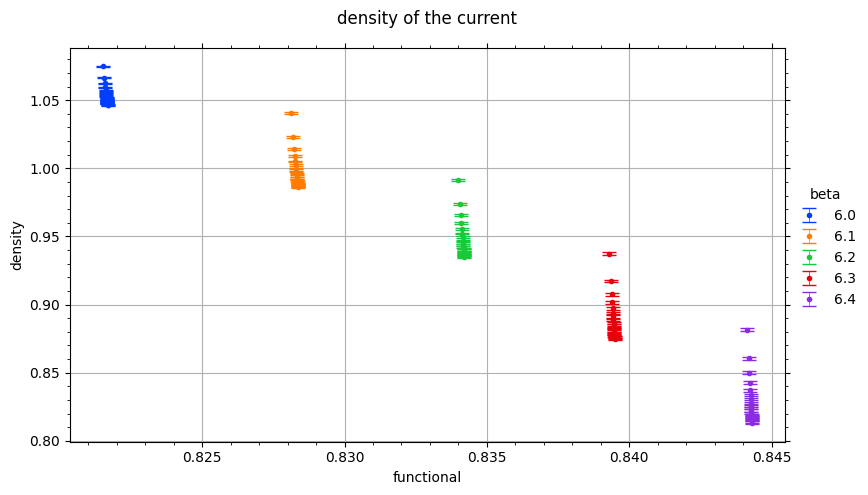

In [ ]:
paths_functional = [{'path': '../../data/mag/functional/su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s1/functional', 'conf_range': (1, 5000), 'parameters': {'beta': 6.0}, 'chain': 1},
                    {'path': '../../data/mag/functional/su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s2/functional', 'conf_range': (1, 5000), 'parameters': {'beta': 6.0}, 'chain': 2},
                    {'path': '../../data/mag/functional/su3/gluodynamics/28^4/beta6.1/steps_0/copies=20/functional', 'conf_range': (1, 5000), 'parameters': {'beta': 6.1}},
                    {'path': '../../data/mag/functional/su3/gluodynamics/32^4/beta6.2/steps_0/copies=20/functional', 'conf_range': (1, 5000), 'parameters': {'beta': 6.2}},
                    {'path': '../../data/mag/functional/su3/gluodynamics/36^4/beta6.3/steps_0/copies=20/functional', 'conf_range': (1, 5000), 'parameters': {'beta': 6.3}},
                    {'path': '../../data/mag/functional/su3/gluodynamics/40^4/beta6.4/steps_0/copies=20/s1/functional', 'conf_range': (1, 5000), 'parameters': {'beta': 6.4}, 'chain': 1},
                    {'path': '../../data/mag/functional/su3/gluodynamics/40^4/beta6.4/steps_0/copies=20/s2/functional', 'conf_range': (1, 5000), 'parameters': {'beta': 6.4}, 'chain': 2}]
paths_clusters_wrapped = [{'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s1/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.0, 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6)}, 'copies_num': 20, 'chain': 1},
                          {'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s2/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.0, 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6)}, 'copies_num': 20, 'chain': 2},
                          {'path': '../../data/monopoles_su3/gluodynamics/28^4/beta6.1/steps_0/copies=20/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.1, 'lattice_size': 4*28**4, 'r0': scaler.get_r0(6.1)}, 'copies_num': 20},
                          {'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.2/steps_0/copies=20/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.2, 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6.2)}, 'copies_num': 20},
                          {'path': '../../data/monopoles_su3/gluodynamics/36^4/beta6.3/steps_0/copies=20/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.3, 'lattice_size': 4*36**4, 'r0': scaler.get_r0(6.3)}, 'copies_num': 20},
                          {'path': '../../data/monopoles_su3/gluodynamics/40^4/beta6.4/steps_0/copies=20/s1/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.4, 'lattice_size': 4*40**4, 'r0': scaler.get_r0(6.4)}, 'copies_num': 20, 'chain': 1},
                          {'path': '../../data/monopoles_su3/gluodynamics/40^4/beta6.4/steps_0/copies=20/s2/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.4, 'lattice_size': 4*40**4, 'r0': scaler.get_r0(6.4)}, 'copies_num': 20, 'chain': 2}]
paths_clusters_unwrapped = [{'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s1/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.0, 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6)}, 'copies_num': 20, 'chain': 1},
                            {'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.0/steps_0/copies=20/s2/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.0, 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6)}, 'copies_num': 20, 'chain': 2},
                            {'path': '../../data/monopoles_su3/gluodynamics/28^4/beta6.1/steps_0/copies=20/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.1, 'lattice_size': 4*28**4, 'r0': scaler.get_r0(6.1)}, 'copies_num': 20},
                            {'path': '../../data/monopoles_su3/gluodynamics/32^4/beta6.2/steps_0/copies=20/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.2, 'lattice_size': 4*32**4, 'r0': scaler.get_r0(6.2)}, 'copies_num': 20},
                            {'path': '../../data/monopoles_su3/gluodynamics/36^4/beta6.3/steps_0/copies=20/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.3, 'lattice_size': 4*36**4, 'r0': scaler.get_r0(6.3)}, 'copies_num': 20},
                            {'path': '../../data/monopoles_su3/gluodynamics/40^4/beta6.4/steps_0/copies=20/s1/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.4, 'lattice_size': 4*40**4, 'r0': scaler.get_r0(6.4)}, 'copies_num': 20, 'chain': 1},
                            {'path': '../../data/monopoles_su3/gluodynamics/40^4/beta6.4/steps_0/copies=20/s2/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.4, 'lattice_size': 4*40**4, 'r0': scaler.get_r0(6.4)}, 'copies_num': 20, 'chain': 2}]
cluster_density(paths_functional, paths_clusters_wrapped, paths_clusters_unwrapped, ['beta'], '../../images/monopoles/su3/gluodynamics', 'current density beta', '../../result/monopoles/su3/gluodynamics', 'density_beta', hue='beta')

In [ ]:
# average percolating cluster depending on gauge copy and on average functional
def percolating_cluster_copy(paths_functional, paths_clusters_wrapped, paths_clusters_unwrapped, groupby_keys, hue, length_threshold, image_path, image_name):
    df_func = read_functional(paths_functional)
    df_func = fill_funcational_max(df_func, groupby_keys)
    df_clusters_wrapped = monopole_data.read_data_wrapped_copies(paths_clusters_wrapped)
    df_clusters_wrapped = df_clusters_wrapped.groupby(groupby_keys).apply(fillup_copies).reset_index(drop=True)
    df_clusters_unwrapped = monopole_data.read_data_unwrapped_copies(paths_clusters_unwrapped)
    df_clusters_unwrapped = df_clusters_unwrapped.groupby(groupby_keys).apply(fillup_copies).reset_index(drop=True)
    data_clusters = percolating_cluster.clusters_divide(df_clusters_unwrapped, df_clusters_wrapped, length_threshold, groupby_keys + ['conf', 'copy'])
    data_clusters = data_clusters.groupby(groupby_keys + ['copy'])['length'].agg([('length', np.mean), ('std_length', lambda x: np.std(x, ddof=1)/math.sqrt(np.size(x)))]).reset_index(level=groupby_keys + ['copy'])
    data_clusters = data_clusters.merge(df_func, how='inner', on=groupby_keys + ['copy'])
    make_plot(data_clusters, 'functional', 'length', 'percolating cluster dependence on copy', image_path, image_name, hue=hue, err='std_length')

   color length x0_wrap x1_wrap x2_wrap x3_wrap percolating_group  conf  copy  \
0      1   2680       2       0      -1       1       percolating     1     1   
1      1   1878      -2      -1       0      -1       percolating     1     1   
2      1    524       0       1       1       0       percolating     1     1   
3      2   3172       0       1      -1      -1       percolating     1     1   
4      2   1400       0      -1       1       1       percolating     1     1   
..   ...    ...     ...     ...     ...     ...               ...   ...   ...   
4      1    112       0       0      -1       0       percolating   684     6   
5      2   3484       0      -1       1       0       percolating   684     6   
6      2    318       0       1      -1       0       percolating   684     6   
0      3      0       0       0       0       0       percolating   684     6   
0      3      0       0       0       0       0   non-percolating   684     6   

    steps  
0     100  
1  

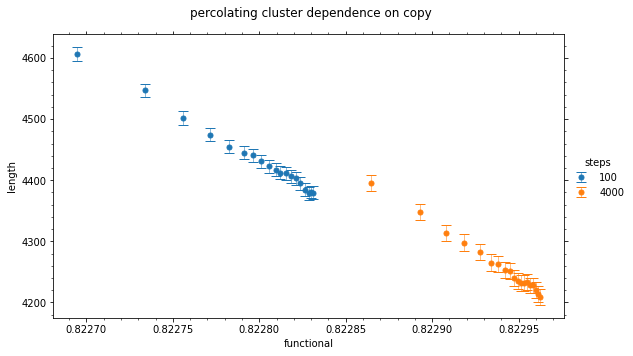

../../images/monopoles/su3/24^4/beta6.0/percolating_cluster_functional_dependence_beta6p0


In [ ]:
paths_functional = [{'path': '../../data/mag/functional/su3/gluodynamics/24^4/beta6.0/steps_100/copies=20/0.01/functional', 'conf_range': (1, 1000), 'parameters': {'steps': 100}},
                    {'path': '../../data/mag/functional/su3/gluodynamics/24^4/beta6.0/steps_4000/copies=20/0.01/functional', 'conf_range': (1, 1000), 'parameters': {'steps': 4000}}]
paths_clusters_wrapped = [{'path': '../../data/monopoles_su3/gluodynamics/24^4/beta6.0/steps_100/copies=20/0.01/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 1000), 'parameters': {'steps': 100}, 'copies_num': 20},
                    {'path': '../../data/monopoles_su3/gluodynamics/24^4/beta6.0/steps_4000/copies=20/0.01/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 1000), 'parameters': {'steps': 4000}, 'copies_num': 20}]
paths_clusters_unwrapped = [{'path': '../../data/monopoles_su3/gluodynamics/24^4/beta6.0/steps_100/copies=20/0.01/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 1000), 'parameters': {'steps': 100}, 'copies_num': 20},
                    {'path': '../../data/monopoles_su3/gluodynamics/24^4/beta6.0/steps_4000/copies=20/0.01/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 1000), 'parameters': {'steps': 4000}, 'copies_num': 20}]
percolating_cluster_copy(paths_functional, paths_clusters_wrapped, paths_clusters_unwrapped, ['steps'], 'steps', 1500, '../../images/monopoles/su3/24^4/beta6.0', 'percolating_cluster_functional_dependence_beta6p0')

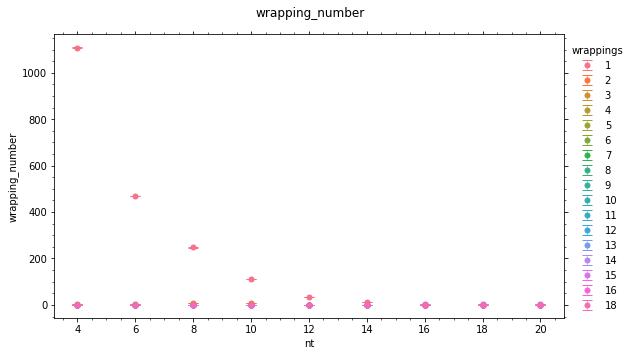

../../images/monopoles/su3/QCD/140MeV/wrappings_together


In [ ]:
paths_wrapped = [{'path': '../../data/monopoles_su3/QCD/140MeV/nt4/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 4}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt6/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 6}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt8/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 8}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt10/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 10}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt12/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 12}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt14/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 14}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt16/steps_500/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 16}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt18/steps_500/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 18}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt20/steps_500/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 20}}]
df = wrappings.wrappings_separate(paths_wrapped, 1000000, ['nt'])
make_plot(df, 'nt', 'wrapping_number', 'wrapping_number', '../../images/monopoles/su3/QCD/140MeV', 'wrappings_together', hue='wrappings', err='std')

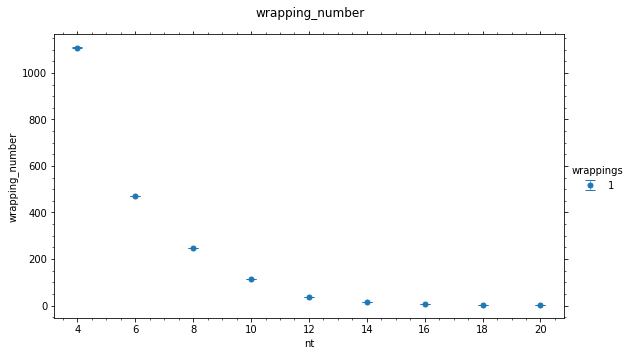

../../images/monopoles/su3/QCD/140MeV/wrappings_1


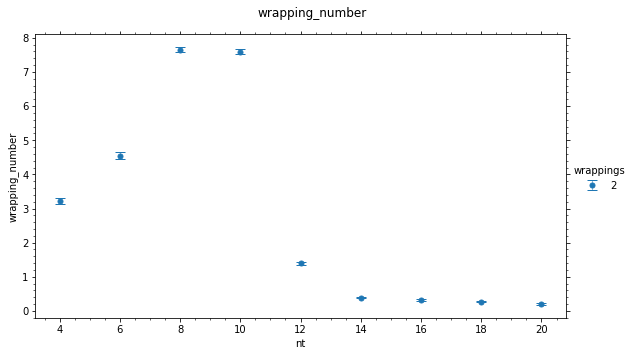

../../images/monopoles/su3/QCD/140MeV/wrappings_2


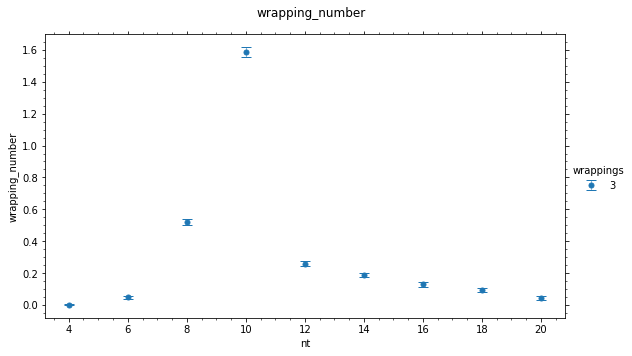

../../images/monopoles/su3/QCD/140MeV/wrappings_3


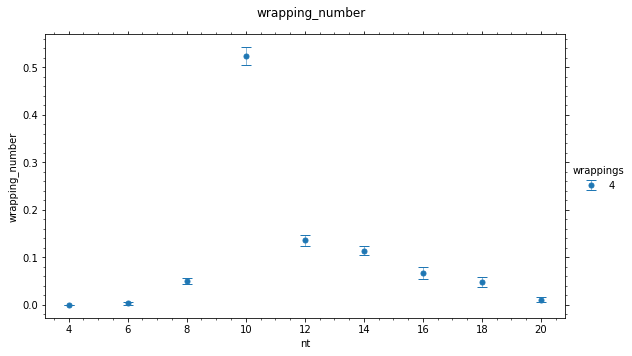

../../images/monopoles/su3/QCD/140MeV/wrappings_4


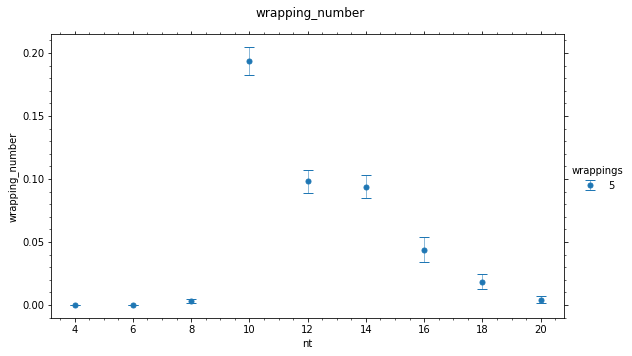

../../images/monopoles/su3/QCD/140MeV/wrappings_5


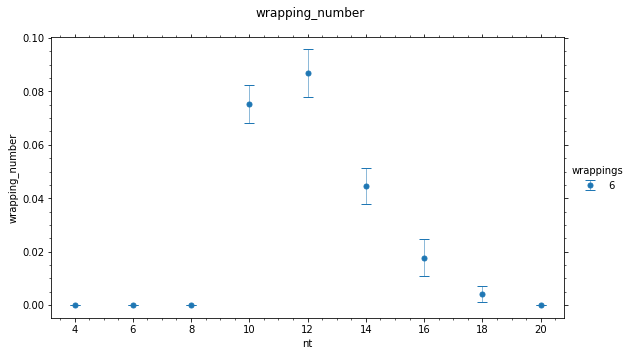

../../images/monopoles/su3/QCD/140MeV/wrappings_6


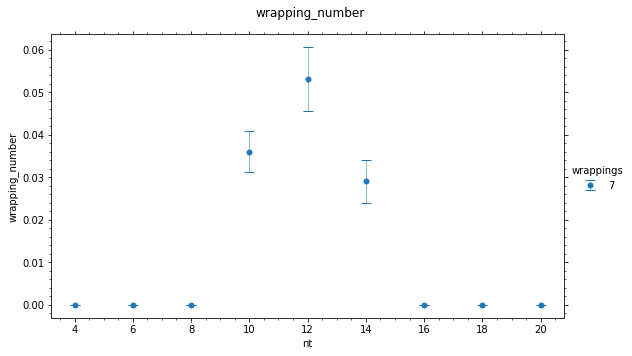

../../images/monopoles/su3/QCD/140MeV/wrappings_7


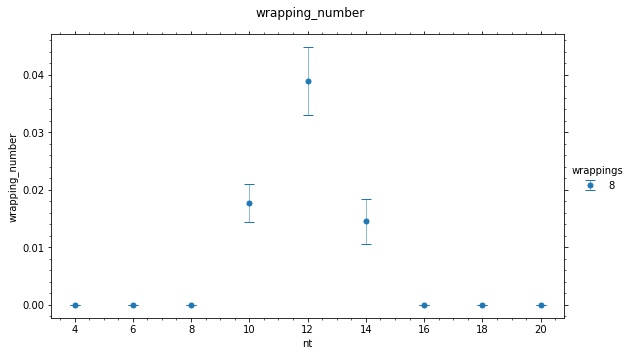

../../images/monopoles/su3/QCD/140MeV/wrappings_8


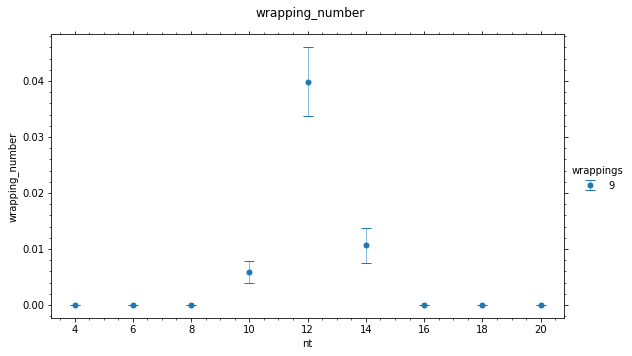

../../images/monopoles/su3/QCD/140MeV/wrappings_9


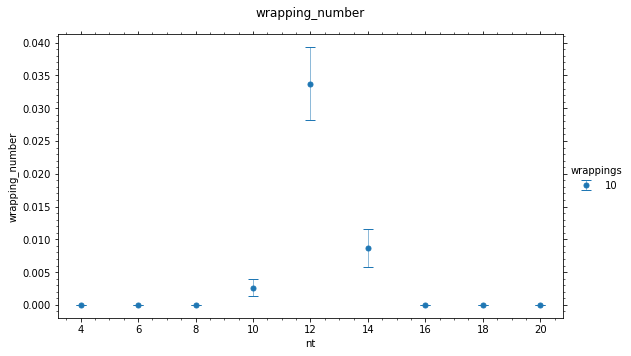

../../images/monopoles/su3/QCD/140MeV/wrappings_10


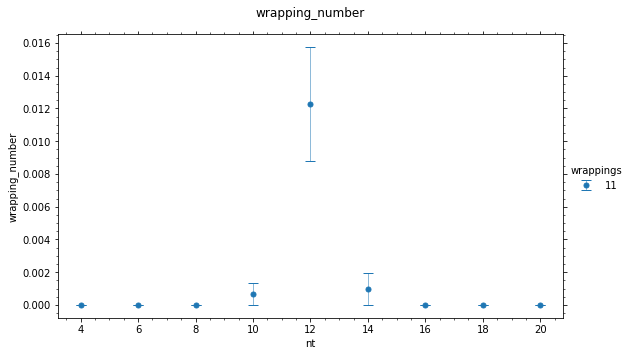

../../images/monopoles/su3/QCD/140MeV/wrappings_11


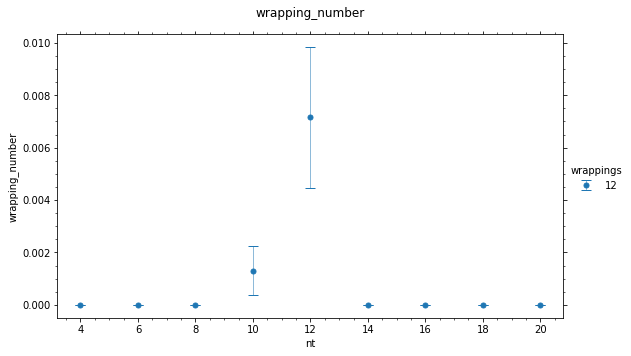

../../images/monopoles/su3/QCD/140MeV/wrappings_12


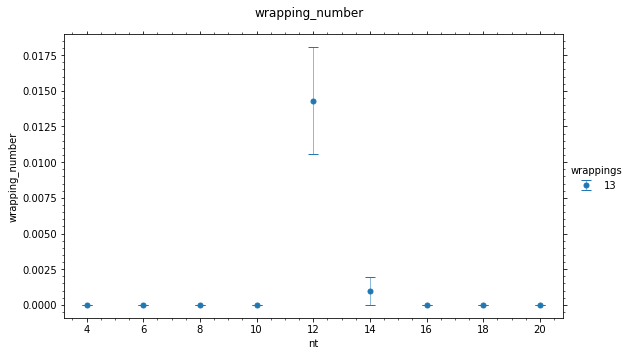

../../images/monopoles/su3/QCD/140MeV/wrappings_13


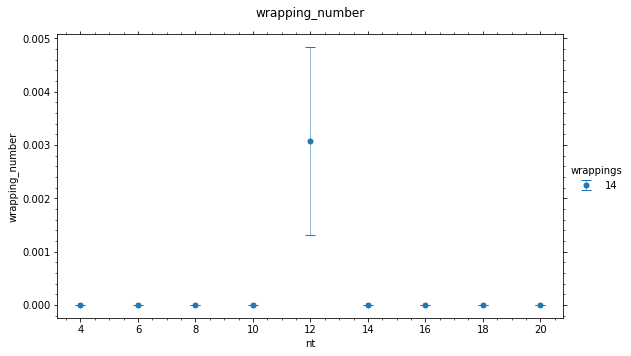

../../images/monopoles/su3/QCD/140MeV/wrappings_14


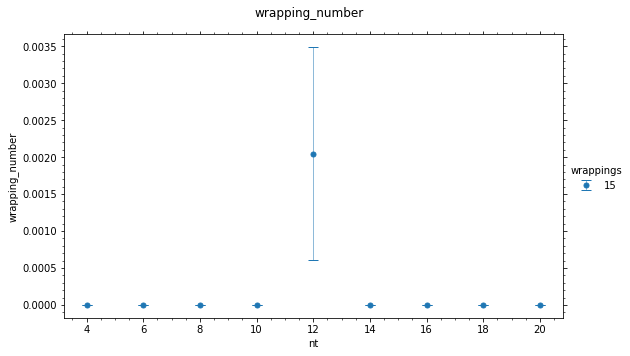

../../images/monopoles/su3/QCD/140MeV/wrappings_15


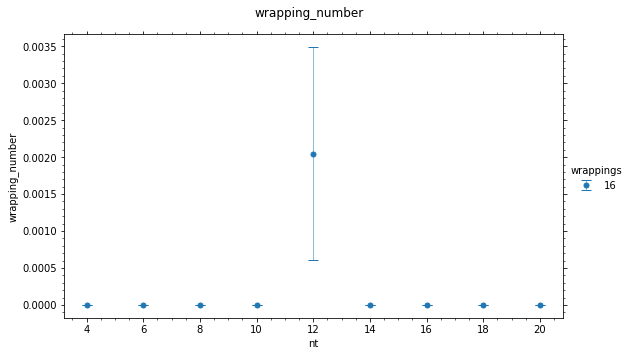

../../images/monopoles/su3/QCD/140MeV/wrappings_16


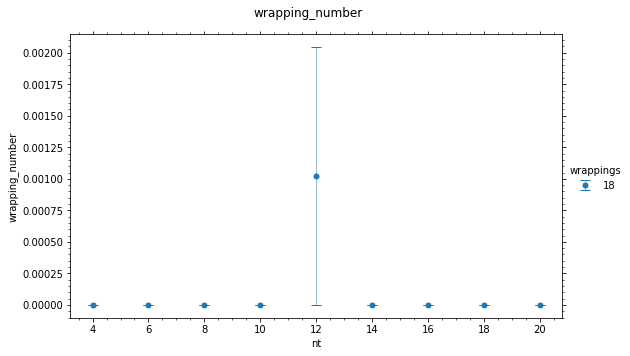

../../images/monopoles/su3/QCD/140MeV/wrappings_18


In [8]:
paths_wrapped = [{'path': '../../data/monopoles_su3/QCD/140MeV/nt4/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 4}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt6/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 6}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt8/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 8}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt10/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 10}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt12/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 12}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt14/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 14}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt16/steps_500/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 16}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt18/steps_500/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 18}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt20/steps_500/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 20}}]
df = wrappings.wrappings_separate(paths_wrapped, 1000000, ['nt'])
for wrap in df['wrappings'].unique():
    make_plot(df[df['wrappings'] == wrap], 'nt', 'wrapping_number', 'wrapping_number', '../../images/monopoles/su3/QCD/140MeV', f'wrappings_{wrap}', hue='wrappings', err='std')
# df.groupby('wrappings').apply(make_plot, 'nt', 'wrapping_number', 'wrapping_number', '../../images/monopoles/QCD/140MeV', 'wrappings', hue='wrappings', err='std')

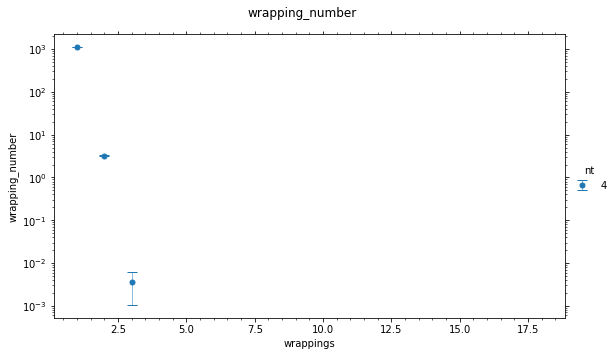

../../images/monopoles/su3/QCD/140MeV/wrapping_number_nt=4


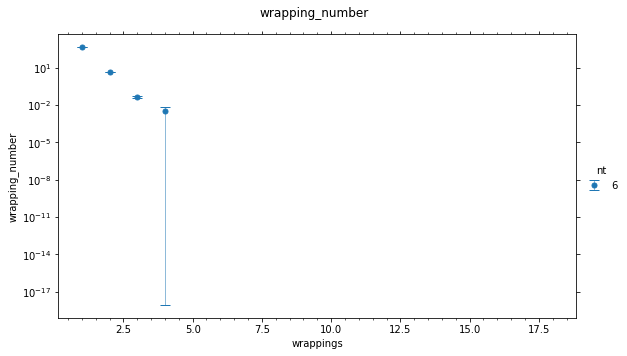

../../images/monopoles/su3/QCD/140MeV/wrapping_number_nt=6


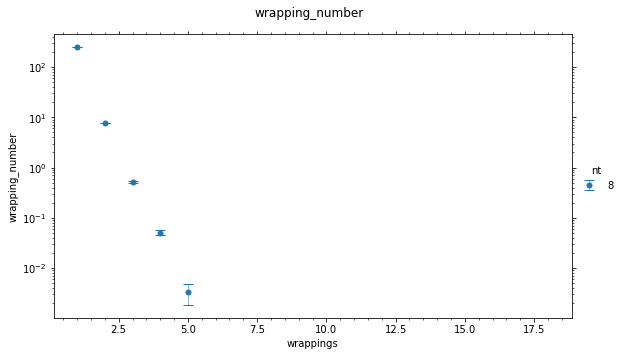

../../images/monopoles/su3/QCD/140MeV/wrapping_number_nt=8


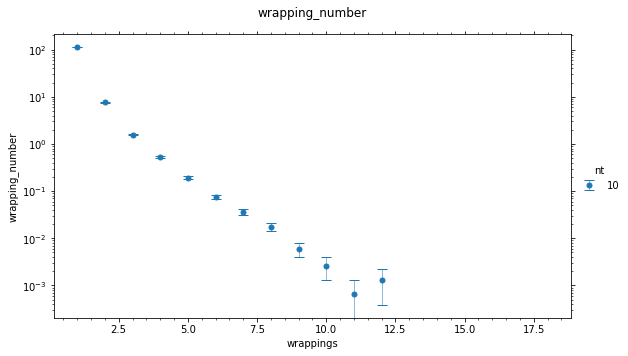

../../images/monopoles/su3/QCD/140MeV/wrapping_number_nt=10


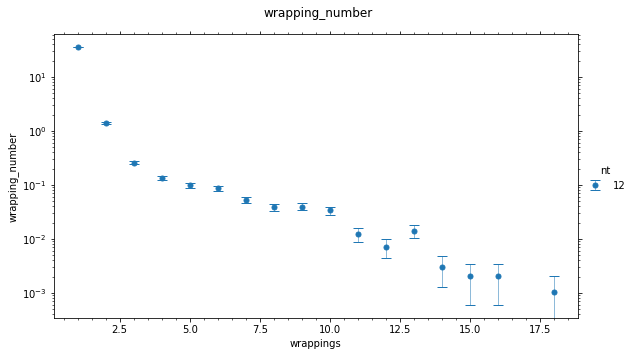

../../images/monopoles/su3/QCD/140MeV/wrapping_number_nt=12


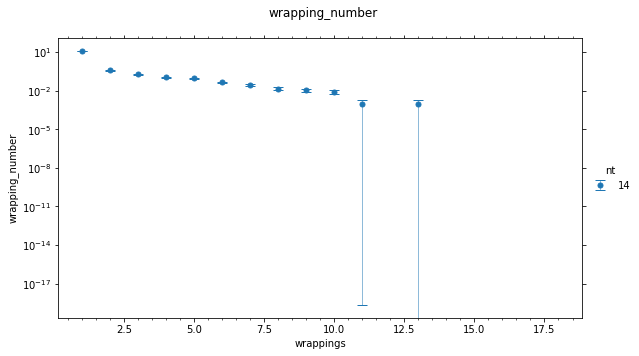

../../images/monopoles/su3/QCD/140MeV/wrapping_number_nt=14


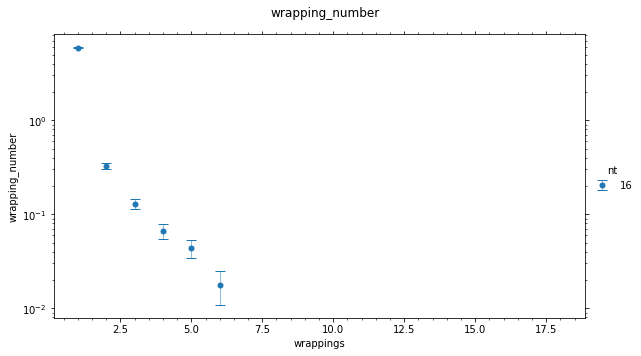

../../images/monopoles/su3/QCD/140MeV/wrapping_number_nt=16


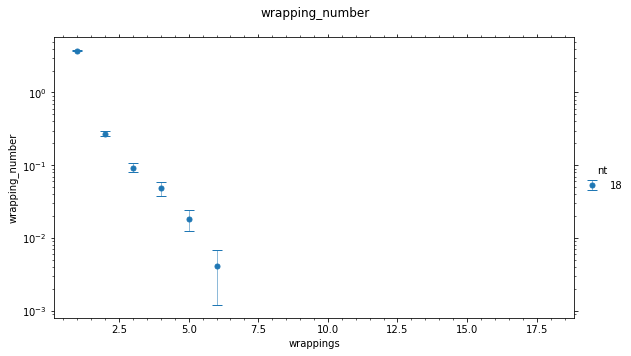

../../images/monopoles/su3/QCD/140MeV/wrapping_number_nt=18


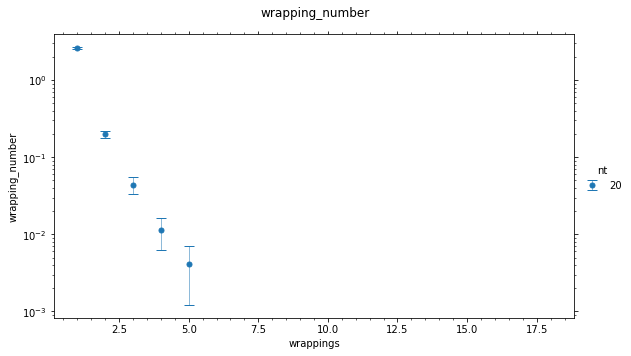

../../images/monopoles/su3/QCD/140MeV/wrapping_number_nt=20


In [13]:
paths_wrapped = [{'path': '../../data/monopoles_su3/QCD/140MeV/nt4/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 4}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt6/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 6}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt8/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 8}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt10/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 10}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt12/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 12}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt14/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 14}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt16/steps_500/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 16}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt18/steps_500/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 18}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt20/steps_500/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 20}}]
df = wrappings.wrappings_separate(paths_wrapped, 1000000, ['nt'])
# make_plot(df, 'wrappings', 'wrapping_number', 'wrapping_number', '../../images/monopoles/QCD/140MeV', 'wrapping_nt', hue='nt', err='std')
for nt in df['nt'].unique():
    make_plot(df[df['nt'] == nt], 'wrappings', 'wrapping_number', 'wrapping_number', '../../images/monopoles/su3/QCD/140MeV', f'wrapping_number_nt={nt}', hue='nt', err='std')
# df.groupby('nt').apply(make_plot, 'wrappings', 'wrapping_number', 'wrapping_number', '../../images/monopoles/su3/QCD/140MeV', 'wrapping_number_nt', hue='nt', err='std')

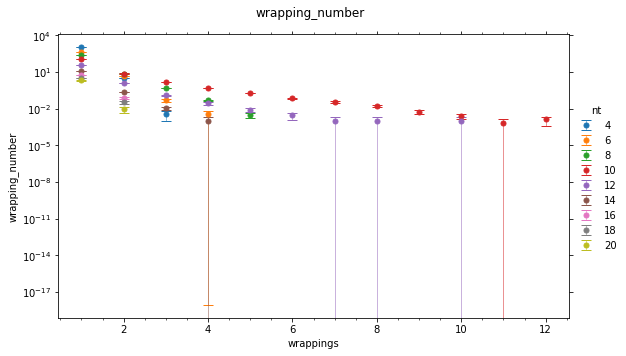

../../images/monopoles/su3/QCD/140MeV/wrappings_nt_together


In [12]:
paths_wrapped = [{'path': '../../data/monopoles_su3/QCD/140MeV/nt4/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 4}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt6/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 6}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt8/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 8}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt10/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 10}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt12/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 12}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt14/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 14}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt16/steps_500/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 16}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt18/steps_500/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 18}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt20/steps_500/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 20}}]
df = wrappings.wrappings_separate(paths_wrapped, 50000, ['nt'])
make_plot(df, 'wrappings', 'wrapping_number', 'wrapping_number', '../../images/monopoles/su3/QCD/140MeV', 'wrappings_nt_together', hue='nt', err='std')

In [11]:
def percolating_cluster_average(paths_wrapped, paths_unwrapped, groupby_keys, length_threshold, x, y, title, image_path, image_name, hue=None, err=None):
    df_clusters_wrapped = monopole_data.read_data_wrapped(paths_wrapped)
    df_clusters_unwrapped = monopole_data.read_data_unwrapped(paths_unwrapped)
    data_clusters = percolating_cluster.clusters_divide(df_clusters_unwrapped, df_clusters_wrapped, length_threshold, groupby_keys + ['conf'])
    print(data_clusters)
    data_clusters = data_clusters.groupby(groupby_keys)['length'].agg([('length', np.mean), ('std', lambda x: np.std(x, ddof=1)/math.sqrt(np.size(x)))]).reset_index(level=groupby_keys)
    print(data_clusters)
    make_plot(data_clusters, x, y, title, image_path, image_name, hue=hue)

      nt  conf         length
0      4   501     132.666667
1      4   502     105.333333
2      4   503     112.666667
3      4   504     116.666667
4      4   505     127.333333
...   ..   ...            ...
2540  20   694  161860.666667
2541  20   696  164998.666667
2542  20   697  161943.333333
2543  20   698  161780.000000
2544  20   699  163526.000000

[2545 rows x 3 columns]
   nt         length         std
0   4     117.119430    0.917482
1   6     334.550427    3.268953
2   8    1241.147256   10.338988
3  10    9437.643746  135.681859
4  12   66681.577982  308.126970
5  14   94752.381783  122.850770
6  16  128825.237500  194.167577
7  18  145410.879346  208.985641
8  20  164830.176955  267.196923


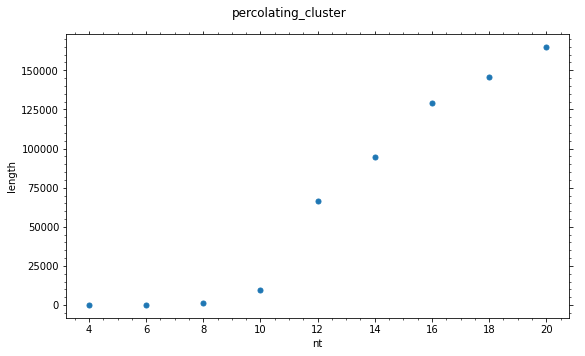

../../images/monopoles/su3/QCD/140MeV/percolating_cluster_nt


In [12]:
paths_wrapped = [{'path': '../../data/monopoles_su3/QCD/140MeV/nt4/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 4}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt6/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 6}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt8/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 8}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt10/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 10}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt12/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 12}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt14/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 14}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt16/steps_500/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 16}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt18/steps_500/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 18}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt20/steps_500/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 20}}]
paths_unwrapped = [{'path': '../../data/monopoles_su3/QCD/140MeV/nt4/steps_2000/copies=1/clusters_unwrapped/clusters_unwrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 4}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt6/steps_2000/copies=1/clusters_unwrapped/clusters_unwrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 6}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt8/steps_2000/copies=1/clusters_unwrapped/clusters_unwrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 8}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt10/steps_2000/copies=1/clusters_unwrapped/clusters_unwrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 10}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt12/steps_2000/copies=1/clusters_unwrapped/clusters_unwrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 12}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt14/steps_2000/copies=1/clusters_unwrapped/clusters_unwrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 14}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt16/steps_500/copies=1/clusters_unwrapped/clusters_unwrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 16}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt18/steps_500/copies=1/clusters_unwrapped/clusters_unwrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 18}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt20/steps_500/copies=1/clusters_unwrapped/clusters_unwrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 20}}]
percolating_cluster_average(paths_wrapped, paths_unwrapped, ['nt'], 10000, 'nt', 'length', 'percolating_cluster', '../../images/monopoles/su3/QCD/140MeV', 'percolating_cluster_nt', err='std')

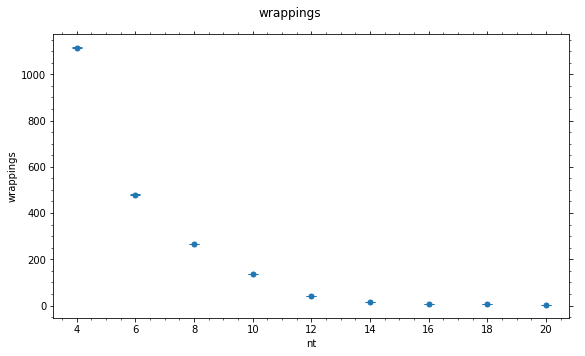

../../images/monopoles/su3/QCD/140MeV/wrappings_average


In [13]:
paths_wrapped = [{'path': '../../data/monopoles_su3/QCD/140MeV/nt4/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 4}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt6/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 6}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt8/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 8}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt10/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 10}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt12/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 12}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt14/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 14}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt16/steps_500/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 16}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt18/steps_500/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 18}},
                 {'path': '../../data/monopoles_su3/QCD/140MeV/nt20/steps_500/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 20}}]
df = wrappings.wrappings(paths_wrapped, 10000000, ['nt'])
make_plot(df, 'nt', 'wrappings', 'wrappings', '../../images/monopoles/su3/QCD/140MeV', 'wrappings_average', err='std')

In [14]:
def cluster_number_normalize(df):
    norm_factor = df.at[df['length'].idxmin(), 'number']
    df['number'] = df['number'] / norm_factor
    df['std'] = df['std'] / norm_factor
    return df

def cluster_number_aver(paths, length_threshold, groupby_keys, image_path, image_name, hue=None):
    df = monopole_data.read_data_unwrapped(paths)
    df = df[df['length'] < length_threshold]
    df = df.set_index(groupby_keys + ['color', 'conf', 'length']).unstack(['length'], fill_value=0).stack().reset_index()
    df = df.groupby(groupby_keys + ['length', 'conf'])['number'].agg([('number', np.mean)]).reset_index(level=groupby_keys + ['length'])
    df = df.groupby(groupby_keys + ['length'])['number'].agg([('number', np.mean), ('std', lambda x: np.std(x, ddof=1)/math.sqrt(np.size(x)))]).reset_index(level=groupby_keys + ['length'])
    df = df.groupby(groupby_keys, group_keys=False).apply(cluster_number_normalize)
    make_plot(df, 'length', 'number', 'length distribution of non-percolating clusters', image_path, image_name, hue=hue, err='std')

def cluster_number_aver_copies(paths, length_threshold, groupby_keys, image_path, image_name, hue=None):
    df = monopole_data.read_data_unwrapped_copies(paths)
    df = df[df['length'] < length_threshold]
    df = df.set_index(groupby_keys + ['color', 'conf', 'length']).unstack(['length'], fill_value=0).stack().reset_index()
    df = df.groupby(groupby_keys + ['length', 'conf'])['number'].agg([('number', np.mean)]).reset_index(level=groupby_keys + ['length'])
    df = df.groupby(groupby_keys + ['length'])['number'].agg([('number', np.mean), ('std', lambda x: np.std(x, ddof=1)/math.sqrt(np.size(x)))]).reset_index(level=groupby_keys + ['length'])
    # df = df.groupby(groupby_keys, group_keys=False).apply(cluster_number_normalize)
    make_plot(df, 'length', 'number', 'length distribution of non-percolating clusters', image_path, image_name, hue=hue, err='std')

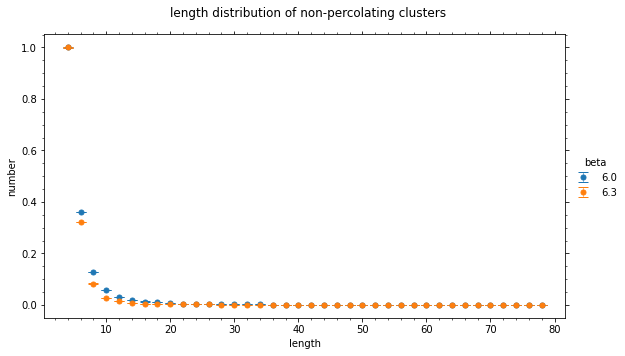

../../images/monopoles/su3/cluster_length_distribution_beta6p0_6p3


In [15]:
paths = [{'path': '../../data/monopoles_su3/gluodynamics/24^4/beta6.0/steps_500/copies=4/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.0}},
         {'path': '../../data/monopoles_su3/gluodynamics/36^4/beta6.3/steps_500/copies=4/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'beta': 6.3}}]
cluster_number_aver(paths, 80, ['beta'], '../../images/monopoles/su3', 'cluster_length_distribution_beta6p0_6p3', hue='beta')

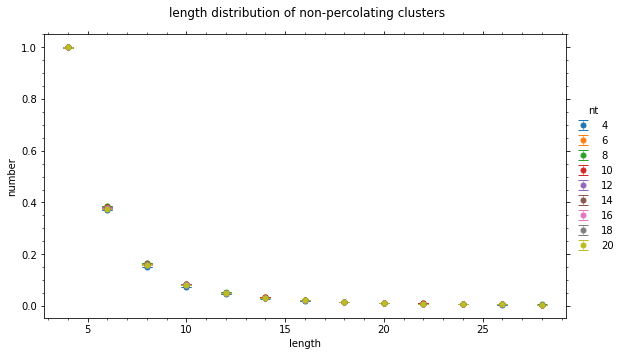

../../images/su3/QCD/140MeV/cluster_length_distribution_QCD_140MeV


In [16]:
paths = [{'path': '../../data/monopoles_su3/QCD/140MeV/nt4/steps_2000/copies=1/clusters_unwrapped/clusters_unwrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 4}},
         {'path': '../../data/monopoles_su3/QCD/140MeV/nt6/steps_2000/copies=1/clusters_unwrapped/clusters_unwrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 6}},
         {'path': '../../data/monopoles_su3/QCD/140MeV/nt8/steps_2000/copies=1/clusters_unwrapped/clusters_unwrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 8}},
         {'path': '../../data/monopoles_su3/QCD/140MeV/nt10/steps_2000/copies=1/clusters_unwrapped/clusters_unwrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 10}},
         {'path': '../../data/monopoles_su3/QCD/140MeV/nt12/steps_2000/copies=1/clusters_unwrapped/clusters_unwrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 12}},
         {'path': '../../data/monopoles_su3/QCD/140MeV/nt14/steps_2000/copies=1/clusters_unwrapped/clusters_unwrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 14}},
         {'path': '../../data/monopoles_su3/QCD/140MeV/nt16/steps_500/copies=1/clusters_unwrapped/clusters_unwrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 16}},
         {'path': '../../data/monopoles_su3/QCD/140MeV/nt18/steps_500/copies=1/clusters_unwrapped/clusters_unwrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 18}},
         {'path': '../../data/monopoles_su3/QCD/140MeV/nt20/steps_500/copies=1/clusters_unwrapped/clusters_unwrapped', 'conf_range': [1, 1500], 'parameters': {'nt': 20}}]
cluster_number_aver(paths, 30, ['nt'], '../../images/su3/QCD/140MeV', 'cluster_length_distribution_QCD_140MeV', hue='nt')

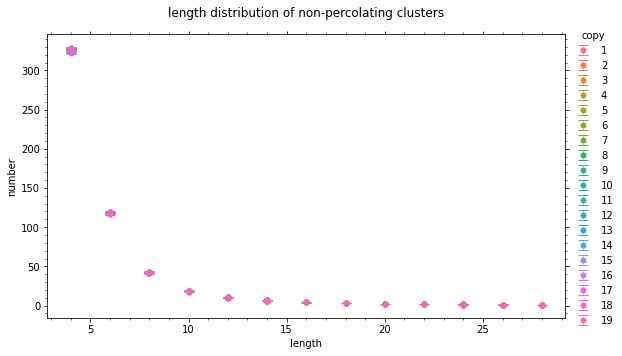

../../images/su3/gluodynamics/24^4/beta6.0/cluster_length_distribution_beta6p0


In [18]:
paths = [{'path': '../../data/monopoles_su3/gluodynamics/24^4/beta6.0/steps_100/copies=20/0.01/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 1000), 'parameters': {'steps': 100}, 'copies_num': 20}]
cluster_number_aver_copies(paths, 30, ['copy', 'steps'], '../../images/su3/gluodynamics/24^4/beta6.0', 'cluster_length_distribution_beta6p0', hue='copy')

In [19]:
# percolating cluster for each configuration depending on functional

def percolating_cluster_conf(paths_functional, paths_clusters_wrapped, paths_clusters_unwrapped, copies_several, groupby_keys, length_threshold, x, y, title, image_path, image_name, hue=None, err=None):
    df_func = read_functional(paths_functional)
    if copies_several:
        df_clusters_wrapped = monopole_data.read_data_wrapped_copies(paths_clusters_wrapped)
        df_clusters_unwrapped = monopole_data.read_data_unwrapped_copies(paths_clusters_unwrapped)
    else:
        df_clusters_wrapped = monopole_data.read_data_wrapped(paths_clusters_wrapped)
        df_clusters_unwrapped = monopole_data.read_data_unwrapped(paths_clusters_unwrapped)
    data_clusters = percolating_cluster.clusters_divide(df_clusters_unwrapped, df_clusters_wrapped, length_threshold, groupby_keys)
    data_clusters = data_clusters.merge(df_func, how='inner', on=groupby_keys)
    make_plot(data_clusters, x, y, title, image_path, image_name, hue=hue, err=err)

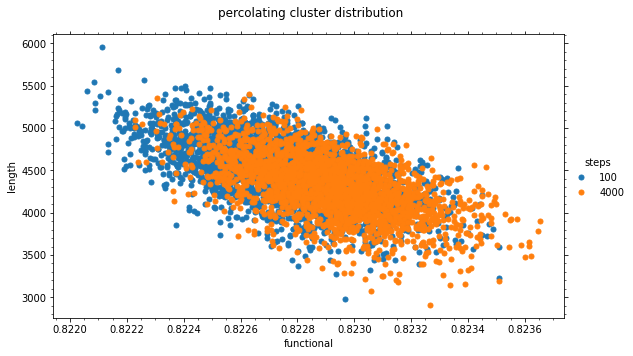

../../images/monopoles/su3/beta6.0/mag_dependence/percolating_cluster_mag_dependence_beta6p0_steps=100


In [20]:
params_functional = [{'path': '../../data/mag/functional/su3/gluodynamics/24^4/beta6.0/steps_100/copies=20/0.01/functional', 'conf_range': (1, 1000), 'parameters': {'steps': 100}},
                    {'path': '../../data/mag/functional/su3/gluodynamics/24^4/beta6.0/steps_4000/copies=20/0.01/functional', 'conf_range': (1, 1000), 'parameters': {'steps': 4000}}]
params_clusters_wrapped = [{'path': '../../data/monopoles_su3/gluodynamics/24^4/beta6.0/steps_100/copies=20/0.01/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 1000), 'parameters': {'steps': 100}, 'copies_num': 20},
                    {'path': '../../data/monopoles_su3/gluodynamics/24^4/beta6.0/steps_4000/copies=20/0.01/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 1000), 'parameters': {'steps': 4000}, 'copies_num': 20}]
params_clusters_unwrapped = [{'path': '../../data/monopoles_su3/gluodynamics/24^4/beta6.0/steps_100/copies=20/0.01/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 1000), 'parameters': {'steps': 100}, 'copies_num': 20},
                    {'path': '../../data/monopoles_su3/gluodynamics/24^4/beta6.0/steps_4000/copies=20/0.01/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 1000), 'parameters': {'steps': 4000}, 'copies_num': 20}]
percolating_cluster_conf(params_functional, params_clusters_wrapped, params_clusters_unwrapped, 'True', ['conf', 'copy', 'steps'], 1500, 'functional', 'length', 'percolating cluster distribution', '../../images/monopoles/su3/beta6.0/mag_dependence',
                        'percolating_cluster_mag_dependence_beta6p0_steps=100', hue='steps')

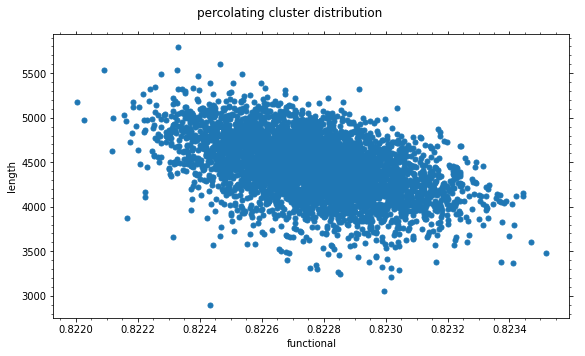

../../images/monopoles/su3/beta6.0/mag_dependence/percolating_cluster_mag_dependence_beta6p0_steps=500


In [21]:
params_functional = [{'path': '../../data/mag/functional/su3/gluodynamics/24^4/beta6.0/steps_500/copies=4/functional', 'conf_range': (1, 5000)}]
params_clusters_wrapped = [{'path': '../../data/monopoles_su3/gluodynamics/24^4/beta6.0/steps_500/copies=4/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000), 'parameters': {'copy': 4}}]
params_clusters_unwrapped = [{'path': '../../data/monopoles_su3/gluodynamics/24^4/beta6.0/steps_500/copies=4/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000), 'parameters': {'copy': 4}}]
percolating_cluster_conf(params_functional, params_clusters_wrapped, params_clusters_unwrapped, False, ['conf', 'copy'], 1500, 'functional', 'length', 'percolating cluster distribution',
                         '../../images/monopoles/su3/beta6.0/mag_dependence', 'percolating_cluster_mag_dependence_beta6p0_steps=500')

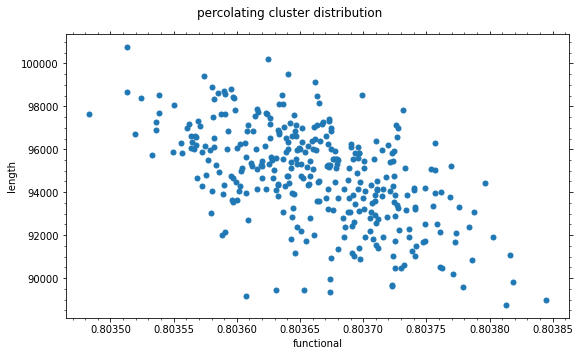

../../images/monopoles/su3/QCD/140MeV/nt14/mag_dependence/percolating_cluster_mag_dependence_nt14


In [22]:
params_functional = [{'path': '../../data/mag/functional/su3/QCD/140MeV/nt14/steps_2000/copies=1/functional', 'conf_range': [501, 860]}]
params_clusters_wrapped = [{'path': '../../data/monopoles_su3/QCD/140MeV/nt14/steps_2000/copies=1/clusters_wrapped/clusters_wrapped', 'conf_range': [501, 860]}]
params_clusters_unwrapped = [{'path': '../../data/monopoles_su3/QCD/140MeV/nt14/steps_2000/copies=1/clusters_unwrapped/clusters_unwrapped', 'conf_range': [501, 860]}]
percolating_cluster_conf(params_functional, params_clusters_wrapped, params_clusters_unwrapped, False, ['conf'], 50000, 'functional', 'length', 'percolating cluster distribution',
                         '../../images/monopoles/su3/QCD/140MeV/nt14/mag_dependence', 'percolating_cluster_mag_dependence_nt14')

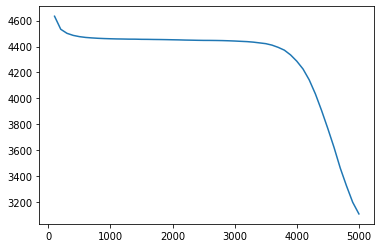

In [5]:
paths_wrapped = [{'path': '../../data/monopoles_su3/gluodynamics/24^4/beta6.0/steps_500/copies=4/clusters_wrapped/clusters_wrapped', 'conf_range': (1, 5000)}]
paths_unwrapped = [{'path': '../../data/monopoles_su3/gluodynamics/24^4/beta6.0/steps_500/copies=4/clusters_unwrapped/clusters_unwrapped', 'conf_range': (1, 5000)}]
image_path = '../images/monopoles_su3/gluodynamics/24^4/beta6.0'
image_name = 'percolating_cluster_steps_500'

percolating_cluster.percolating_clusters(paths_unwrapped, paths_wrapped, 100, 5001, 100, ['conf'], image_path, image_name)